In [1]:
import torch

torch.cuda.is_available()
#!/usr/bin/env python3

import sys,os
from elftools.elf.elffile import ELFFile
from elftools.elf.segments import Segment
from capstone import *
from capstone.x86 import *

import os
import json 

import sys,os
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'


# DATASET GENERATION

# Creating the pipeline

In [2]:

MAX_TOKEN_LEN = 512
BATCH_SIZE = 80
EXPERIMENT_NAME = 'cusTokenizer_BPE_25k_ASIS'

from transformers import BertTokenizer, BertForNextSentencePrediction,BertForPreTraining
import torch
from transformers import PreTrainedTokenizerFast
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer = PreTrainedTokenizerFast.from_pretrained("./../../models/" + EXPERIMENT_NAME) 
print(tokenizer.pad_token) 
# model = BertForNextSentencePrediction.from_pretrained('bert-base-uncased')
model = BertForPreTraining.from_pretrained('bert-base-uncased').to(device)



[PAD]


In [3]:



DATA_PATH = '/home/raisul/ANALYSED_DATA/tokenization_data_single_functions'

TRAIN_DATA_PATH  ='/home/raisul/ANALYSED_DATA/tokenization_data_single_functions/train/'

TEST_DATA_PATH   = '/home/raisul/ANALYSED_DATA/tokenization_data_single_functions/test/'




train_json_files = [os.path.join(TRAIN_DATA_PATH, f) for f in os.listdir(TRAIN_DATA_PATH) ]

test_json_files = [os.path.join(TEST_DATA_PATH, f) for f in os.listdir(TEST_DATA_PATH) ]

# disassembly_decimal disassembly_all_number_to_words disassembly_decimal
data_key = "disassembly_decimal"

print(len(train_json_files))
def read_corpus(json_files):

    all = []

    for k, j_file in enumerate(json_files):
        # if k>200:
        #     break
        try:

            with open(j_file, 'r') as file:
                data = json.load(file)

                funct = data[data_key]['input']
                
                all.append(funct)
        except Exception as e: 
            print(e)
    return all
    


train_text = read_corpus(train_json_files)
test_text  = read_corpus(test_json_files)


        
# text = text[0:5000]
print("Functions Count: ",len(train_text), '\n')
example = train_text[10]
text = train_text + test_text





81107
Functions Count:  81107 



In [4]:
print(text[-1])


ENDBR64
SUB RSP,24
LEA RSI,[8196]
MOV EDI,2
MOV RAX,qword ptr FS:[40]
MOV qword ptr [RSP + 8],RAX
XOR EAX,EAX
CALL 4224
LEA RSI,[RSP + 4]
LEA RDI,[8221]
XOR EAX,EAX
CALL 4240
MOV EAX,dword ptr [RSP + 4]
MOV EDI,2
LEA RSI,[8220]
IMUL EDX,EAX,111
LEA ECX,[RAX + RAX*2]
IMUL EAX,EAX,1111
LEA EDX,[RDX + RCX*4]
ADD EDX,EAX
XOR EAX,EAX
CALL 4224
MOV RAX,qword ptr [RSP + 8]
SUB RAX,qword ptr FS:[40]
JNZ 4379
XOR EAX,EAX
ADD RSP,24
RET
CALL 4208



In [5]:
# text[51].split(delim)

We'll assign a 50% probability of using the genuine next sentence, and 50% probability of using another random sentence.

To make this simpler, we'll create a *'bag'* of individual sentences to pull from when selecting a random sentence B.

In [6]:
delim = '\n'
bag = [instruction for instruction_cluster in text for instruction in instruction_cluster.split(delim)  if instruction!= '']
bag_size = len(bag)
print(bag_size , len(text))

2896720 101107


And now we create our 50/50 NIP training data.

In [7]:
import random

history = []
next_instruction = []
label = []


instruction_pages = []
for instruction_cluster in text:
    instructions = [
        instruction for instruction in instruction_cluster.split(delim) if instruction != ''
    ]

    instruction_pages.append(instructions)
    # if len(instructions)>page_len:
        
    #     for i in range(0,len(instructions),page_len):
    #         instruction_pages.append(instructions[i:i+page_len])
        
print(len(instruction_pages))
print(instruction_pages[0])

for instruction_page in instruction_pages:
    
#     instructions = [
#         instruction for instruction in instruction_page.split(';') if instruction != ''
#     ]
    
    
#     num_instructions = len(instruction_page)
    
    

#     start = random.randint(0, num_instructions-2)
    # 50/50 whether is IsNextSentence or NotNextSentence
    if random.random() >= 0.5:
        # this is IsNextSentence
        history.append(delim.join(instruction_page[:-1]))
        next_instruction.append(instruction_page[-1])
        label.append(0)
    else:
        index = random.randint(0, bag_size-1)
        # this is NotNextSentence
        history.append(delim.join(instruction_page[:-1]))
        next_instruction.append(bag[index])
        label.append(1)

101107
['ENDBR64', 'PUSH R12', 'LEA RSI,[8200]', 'MOV EDI,2', 'PUSH RBP', 'PUSH RBX', 'SUB RSP,32', 'MOV RAX,qword ptr FS:[40]', 'MOV qword ptr [RSP + 24],RAX', 'XOR EAX,EAX', 'CALL 4224', 'LEA RCX,[RSP + 16]', 'LEA RDX,[RSP + 12]', 'XOR EAX,EAX', 'LEA RSI,[RSP + 8]', 'LEA R8,[RSP + 20]', 'LEA RDI,[8246]', 'CALL 4240', 'MOV EBX,dword ptr [RSP + 20]', 'MOV R12D,dword ptr [RSP + 12]', 'LEA RSI,[8258]', 'MOV EBP,dword ptr [RSP + 8]', 'MOV EAX,dword ptr [RSP + 16]', 'MOV EDI,2', 'IMUL EBP,EBX', 'IMUL EAX,R12D', 'IMUL EBX,R12D', 'ADD EBP,EAX', 'XOR EAX,EAX', 'CALL 4224', 'XOR EAX,EAX', 'MOV ECX,EBX', 'MOV EDX,EBP', 'LEA RSI,[8252]', 'MOV EDI,2', 'CALL 4224', 'MOV RAX,qword ptr [RSP + 24]', 'SUB RAX,qword ptr FS:[40]', 'JNZ 4434', 'ADD RSP,32', 'XOR EAX,EAX', 'POP RBX', 'POP RBP', 'POP R12', 'RET', 'CALL 4208']


In [8]:
print(len(label))
for i in range(3):
    print(label[i])
    print('->',history[i] , '\n')
    print('# ',next_instruction[i] , '\n')

101107
0
-> ENDBR64
PUSH R12
LEA RSI,[8200]
MOV EDI,2
PUSH RBP
PUSH RBX
SUB RSP,32
MOV RAX,qword ptr FS:[40]
MOV qword ptr [RSP + 24],RAX
XOR EAX,EAX
CALL 4224
LEA RCX,[RSP + 16]
LEA RDX,[RSP + 12]
XOR EAX,EAX
LEA RSI,[RSP + 8]
LEA R8,[RSP + 20]
LEA RDI,[8246]
CALL 4240
MOV EBX,dword ptr [RSP + 20]
MOV R12D,dword ptr [RSP + 12]
LEA RSI,[8258]
MOV EBP,dword ptr [RSP + 8]
MOV EAX,dword ptr [RSP + 16]
MOV EDI,2
IMUL EBP,EBX
IMUL EAX,R12D
IMUL EBX,R12D
ADD EBP,EAX
XOR EAX,EAX
CALL 4224
XOR EAX,EAX
MOV ECX,EBX
MOV EDX,EBP
LEA RSI,[8252]
MOV EDI,2
CALL 4224
MOV RAX,qword ptr [RSP + 24]
SUB RAX,qword ptr FS:[40]
JNZ 4434
ADD RSP,32
XOR EAX,EAX
POP RBX
POP RBP
POP R12
RET 

#  CALL 4208 

1
-> ENDBR64
MOV EAX,dword ptr [16448]
LEA RCX,[16480]
LEA EDX,[RAX + 1]
ADD EAX,2
MOVSXD RSI,EDX
MOV dword ptr [16448],EDX
MOV dword ptr [RCX + RSI*4],EDI
CMP EAX,2
JA 4839
RET
MOVSXD RDX,EDX
MOV dword ptr [RCX + RSI*4],EDI
MOV dword ptr [RCX + RDX*4],R8D
LEA EDX,[RAX + 1]
CMP EDX,2
JBE 4860
MOV EDI,dword pt

Our data is now ready for tokenization, this time we truncate/pad each token to the same length of *512* tokens.

In [9]:
inputs = tokenizer(history, next_instruction, return_tensors='pt', 
                   max_length=MAX_TOKEN_LEN, truncation=True, padding=True)
ground_truth = inputs.copy() 

In [10]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

We can see that the *token_type_ids* tensors have been built correctly (eg **1** indicating sentence B tokens) by checking the first instance of *token_type_ids*:

In [11]:
print(inputs.input_ids.shape)
inputs.token_type_ids[0]

torch.Size([101107, 413])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

The **0** tokens following our sentence B tokens correspond to *PAD* tokens.

Alongside this, we need to create a *labels* tensor too - which corresponds to the values contained within our `label` variable. Our *labels* tensor must be a *LongTensor*, and we will need to transpose the tensor so that it matches our other tensors' dimensionality.

In [12]:
inputs['next_sentence_label'] = torch.LongTensor([label]).T


And the labels tensor is simply a clone of the input_ids tensor before masking.

In [13]:
inputs['labels'] = inputs.input_ids.detach().clone()

In [14]:
inputs.input_ids[-1]

tensor([   2,  109,  101,   63,    7,  105,   70,   79,   71,  151,   22,   51,
          83,    7,   12,   51,   60,    7,   68,   55,  128,  125,   95,   22,
          51,   68,   55,   21,   63,    6,   18,   78,   60,   73,   53,    7,
          53,   66,  148,   70,   79,   71,   63,    6,   14,   22,   70,   69,
          71,  447,   22,   73,   53,    7,   53,   66,  152,   51,   53,    7,
          85,   55,   21,   63,    6,   14,   22,   51,   83,    7,   12,   70,
          79,   71,  437,   22,  198,   84,    7,   53,    7,  916,   70,  116,
          71,   60,    6,   60,    5,   12,   22,  198,   53,    7,   53,    7,
        6942,   70,   84,   71,   99,    6,  124,    5,   14,   22,   92,   84,
           7,   53,   73,   53,    7,   53,   66,  148,   51,   60,    7,   68,
          55,   21,   63,    6,   18,   22,  101,   60,    7,   68,   55,  128,
         125,   95,   22,  111,  776,   73,   53,    7,   53,   92,   63,    7,
         105,   98,    3,   66,  156,   

Now we mask tokens in the input_ids tensor using the 15% probability for MLM - ensuring we don't mask CLS, SEP, or PAD tokens.

In [15]:
# create random array of floats with equal dimensions to input_ids tensor
rand = torch.rand(inputs.input_ids.shape)
# create mask array
mask_arr = (rand < 0.15) * (inputs.input_ids != 101) * \
           (inputs.input_ids != 102) * (inputs.input_ids != 0)

In [16]:
mask_arr.shape
# inputs.input_ids.shape[0]

torch.Size([101107, 413])

And now take the indices of each True value within each vector.

In [17]:
selection = []

for i in range(inputs.input_ids.shape[0]):
    selection.append(
        torch.flatten(mask_arr[i].nonzero()).tolist()
    )

In [18]:
len (selection) , len(inputs.input_ids), selection[0:3]

(101107,
 101107,
 [[1,
   5,
   11,
   29,
   49,
   51,
   53,
   66,
   94,
   97,
   108,
   115,
   116,
   117,
   140,
   144,
   145,
   148,
   157,
   162,
   164,
   168,
   174,
   184,
   185,
   193,
   198,
   201,
   206,
   209,
   214,
   215,
   223,
   227,
   231,
   239,
   240,
   244,
   247,
   248,
   249,
   272,
   281,
   285,
   287,
   305,
   315,
   327,
   337,
   347,
   349,
   352,
   359,
   365,
   371,
   376,
   378,
   382,
   383,
   395,
   400,
   404,
   406,
   410],
  [0,
   2,
   5,
   10,
   18,
   20,
   28,
   32,
   48,
   52,
   65,
   71,
   78,
   79,
   83,
   96,
   106,
   109,
   113,
   122,
   136,
   139,
   142,
   146,
   150,
   178,
   184,
   189,
   194,
   207,
   211,
   212,
   214,
   217,
   218,
   219,
   224,
   240,
   248,
   249,
   250,
   257,
   259,
   267,
   271,
   272,
   276,
   288,
   297,
   300,
   302,
   311,
   345,
   348,
   350,
   353,
   354,
   355,
   359,
   366,
   368,
   374,
   3

Then apply these indices to each row in input_ids, assigning each value at these indices a value of 103.

In [19]:
inputs.input_ids[0][selection[0]]

tensor([109,  79,   7,  22,   6,  22,  99,  63,  51,  85,  22,  63,   6,  18,
        172, 172,  92,  53,   7, 120,  84,  79,   7,  63,   6, 128, 909,   7,
         53,  87,   3,  66,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1])

In [20]:
masked_labels = []
for i in range(inputs.input_ids.shape[0]):
    masked_labels.append(inputs.input_ids[i, selection[i]])
    inputs.input_ids[i, selection[i]] = 103
# masked_labels[0]
inputs["mask_arr"] = mask_arr

In [21]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'next_sentence_label', 'labels', 'mask_arr'])

The `inputs` tensors are now ready, and we can begin building the model input pipeline for training. We first create a PyTorch dataset from our data.

In [22]:
class MeditationsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings.input_ids)

Initialize our data using the `MeditationDataset` class.

In [23]:
dataset = MeditationsDataset(inputs)
# print(inputs.shape)

In [24]:
print(len(dataset))

101107


In [25]:
print( range(len(train_text)), range(len(train_text) , len(dataset)  ))

range(0, 81107) range(81107, 101107)


In [26]:
# train_data_portion =  len(train_text)/(len(train_text) + len( test_text) )
# print(train_data_portion ,(len(train_text) + len( test_text) ))

# train_size = int(train_data_portion * len(dataset))
# validation_size = len(dataset) - train_size

train_dataset  = torch.utils.data.Subset(dataset, range(len(train_text)))
validation_dataset = torch.utils.data.Subset(dataset, range(len(train_text) , len(dataset)))

len(train_dataset) , len(validation_dataset)

(81107, 20000)

And initialize the dataloader, which we'll be using to load our data into the model during training.

In [27]:

train_loader      = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=True )

In [28]:
# 

Now we can move onto setting up the training loop. First we setup GPU/CPU usage.

In [29]:

# and move our model over to the selected device
# model.to(device)

Activate the training mode of our model, and initialize our optimizer (Adam with weighted decay - reduces chance of overfitting).

In [30]:
from sklearn.metrics import precision_recall_fscore_support , accuracy_score
import numpy as np


Now we can move onto the training loop, we'll train for a couple of epochs (change `epochs` to modify this).

In [31]:
# odict_keys(['loss', 'prediction_logits', 'seq_relationship_logits'])

In [32]:

from numpy import *
import math
import matplotlib.pyplot as plt


def plot_graph(training_data, validation_data , label ):

    font_size = 10
    x_labels = [ i for i in range(len(training_data)) ]

    plt.ylabel(' F1 ',fontsize=font_size)
    plt.plot(x_labels, training_data , 'r') 
    plt.plot(x_labels, validation_data , 'b') 
    plt.xlabel("Epoch", fontsize=font_size)
    plt.title(label,fontsize=font_size)
    plt.legend(['Training', 'Validation'], loc='upper left') 
    
    plt.savefig('./../../results/'+EXPERIMENT_NAME+label+'.pdf')
    plt.show()



/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 0: 100%|███████████████████| 1014/1014 [20:10<00:00,  1.19s/it, loss=1.64]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

Training:   Instruction f1:  0.7187944622465265   Masked Token f1 0.5850840125042795     SEQ F1 0.5863491167174576


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:50<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9120524733533752    v_masked_token_ F1:  0.6648251075070101  V SEQ F1:  0.685042428302114


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


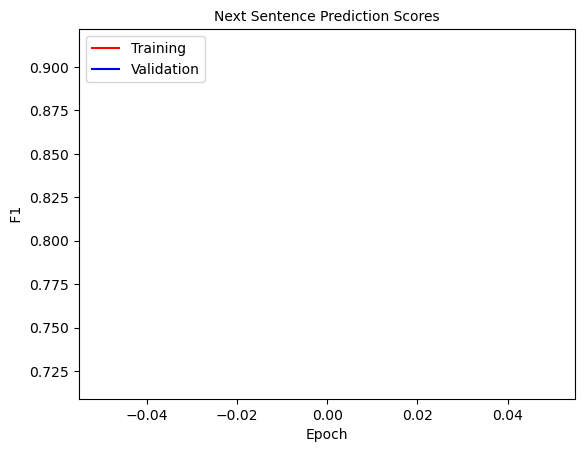

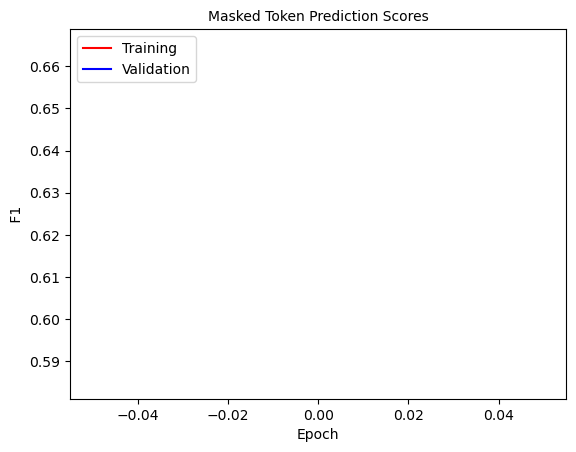

[2024-12-15 20:15:47,919] [INFO] [real_accelerator.py:219:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/raisul/anaconda3/envs/pytorch/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/home/raisul/anaconda3/envs/pytorch/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 1: 100%|███████████████████| 1014/1014 [20:21<00:00,  1.20s/it, loss=1.42]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

Training:   Instruction f1:  0.9063614235905533   Masked Token f1 0.6814876528590411     SEQ F1 0.6988327062217251


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9210568799440348    v_masked_token_ F1:  0.7195081964255399  V SEQ F1:  0.7363119106589786


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


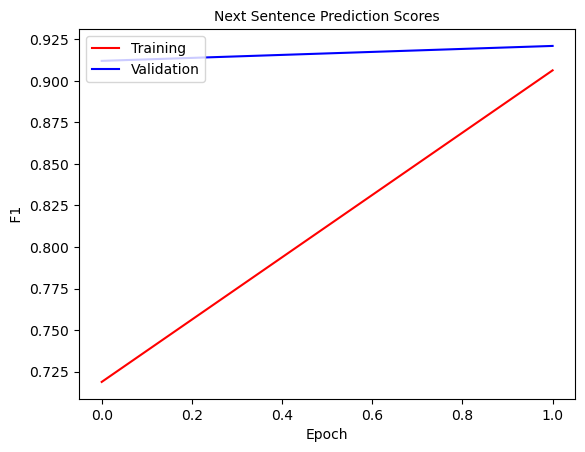

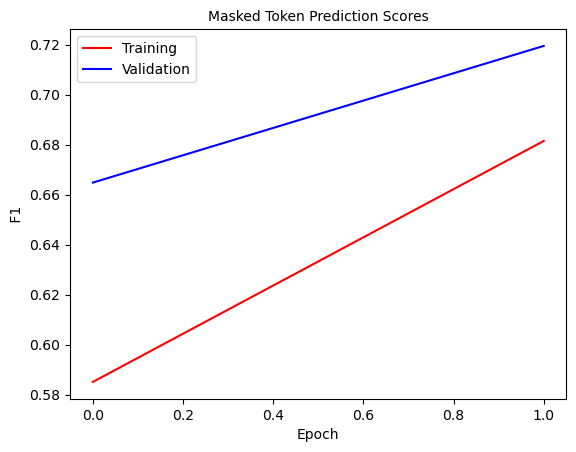

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 2: 100%|██████████████████| 1014/1014 [20:27<00:00,  1.21s/it, loss=0.745]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9159064174617697   Masked Token f1 0.7193293104882094     SEQ F1 0.8158517852296266


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9266656182837972    v_masked_token_ F1:  0.7637891942017161  V SEQ F1:  0.9135536191983721


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


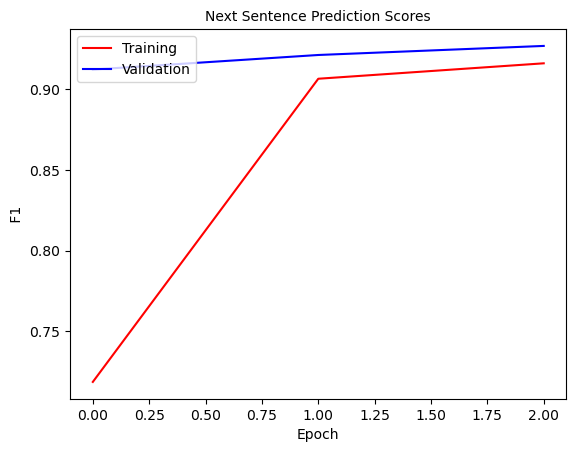

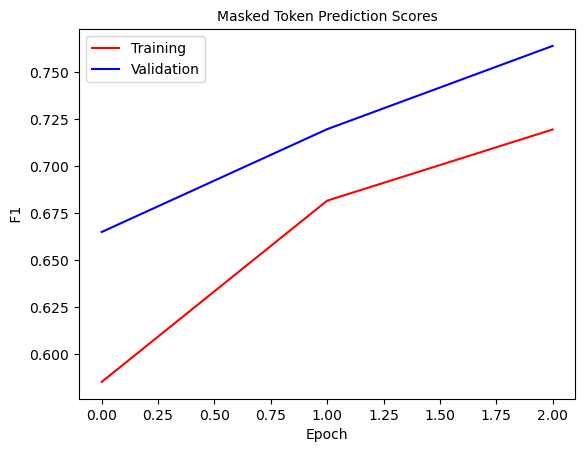

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 3: 100%|██████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.464]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9259634098871156   Masked Token f1 0.760945374675387     SEQ F1 0.9221829420506525


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9405264529580402    v_masked_token_ F1:  0.8053385067487205  V SEQ F1:  0.9454354337988704


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


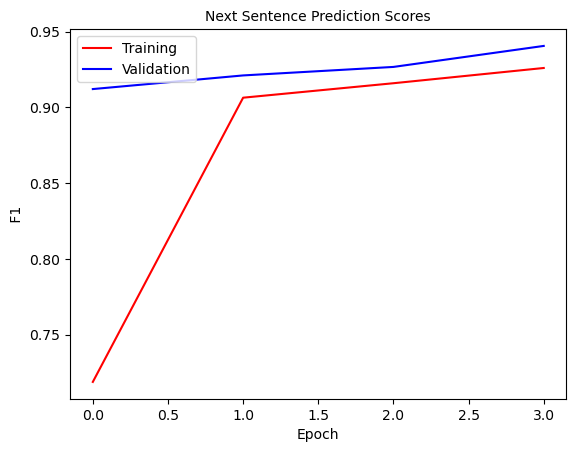

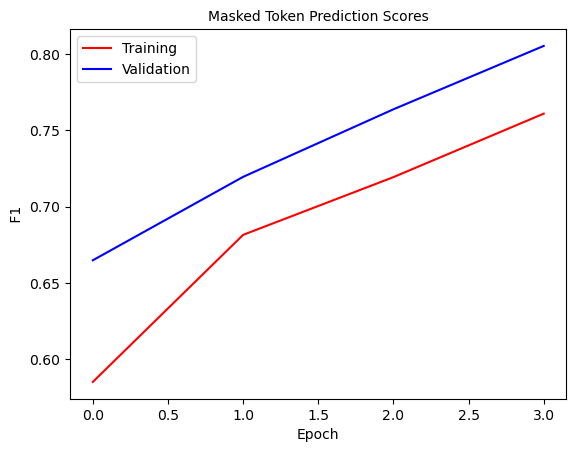

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 4: 100%|██████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.331]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9409582768412167   Masked Token f1 0.7955922368714116     SEQ F1 0.9435682000436454


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:50<00:00,  2.26it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9435316139767055    v_masked_token_ F1:  0.83335485437019  V SEQ F1:  0.9568387843678234


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


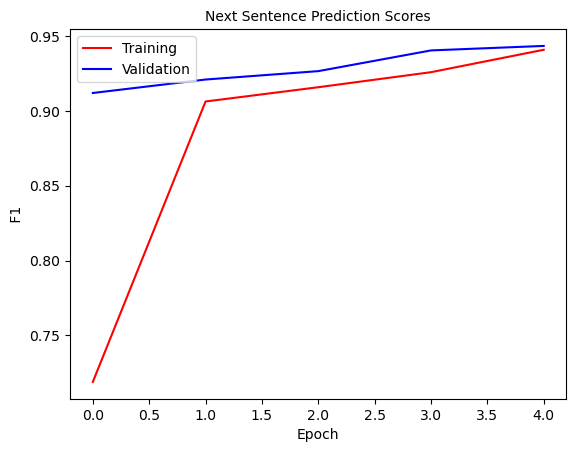

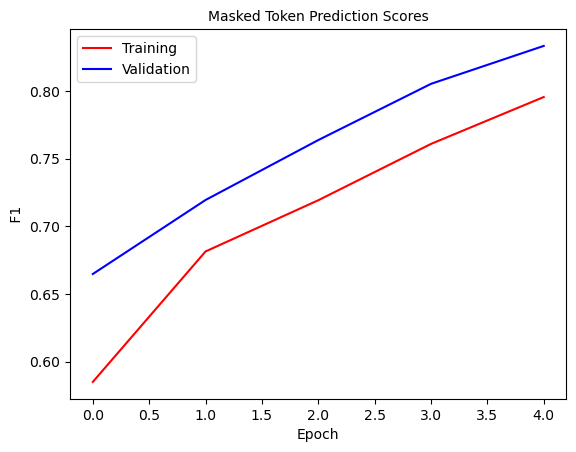

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 5: 100%|██████████████████| 1014/1014 [20:26<00:00,  1.21s/it, loss=0.372]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.945467087362518   Masked Token f1 0.8223628008999375     SEQ F1 0.9538396123869183


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9474463360473723    v_masked_token_ F1:  0.8555031295911933  V SEQ F1:  0.9638386010521725


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


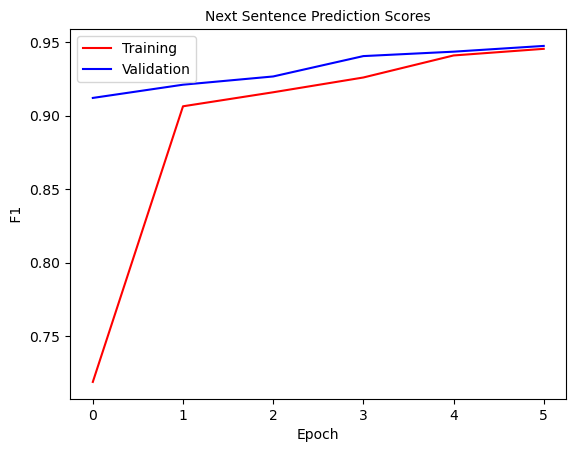

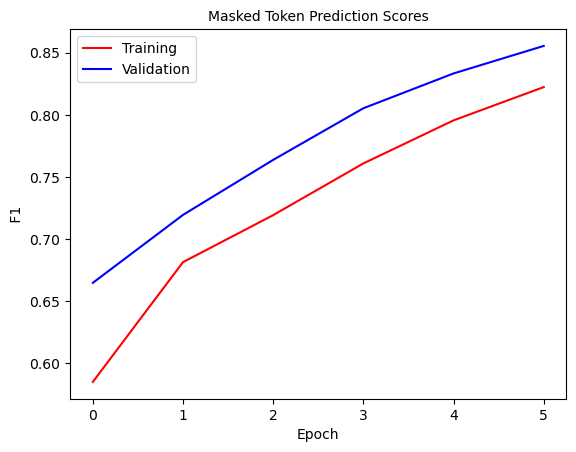

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 6: 100%|██████████████████| 1014/1014 [20:29<00:00,  1.21s/it, loss=0.321]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9493988806303147   Masked Token f1 0.842706778665734     SEQ F1 0.9608721585198006


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9493631238254333    v_masked_token_ F1:  0.8711944939800241  V SEQ F1:  0.9694557449189027


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


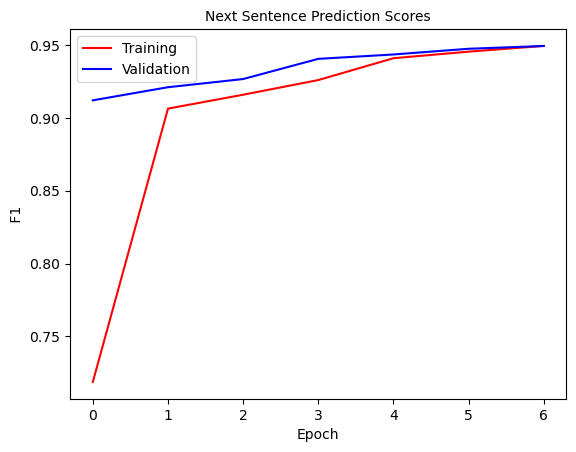

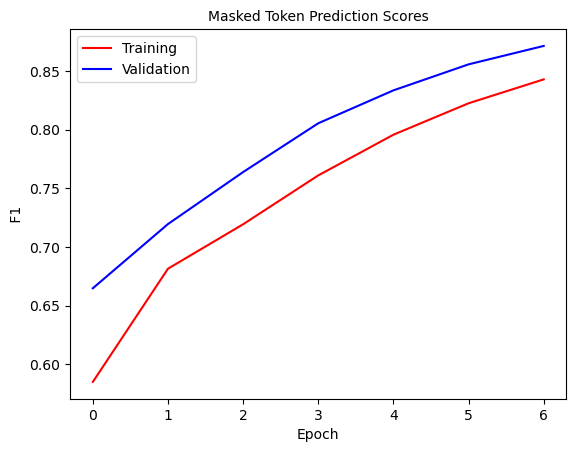

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 7: 100%|██████████████████| 1014/1014 [20:23<00:00,  1.21s/it, loss=0.328]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9520620328753867   Masked Token f1 0.8571195127842146     SEQ F1 0.9665396624745762


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.949736564805058    v_masked_token_ F1:  0.8815666834097423  V SEQ F1:  0.9738158627423867


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


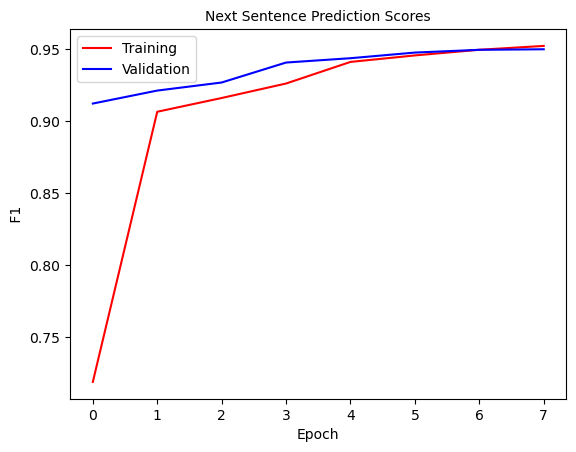

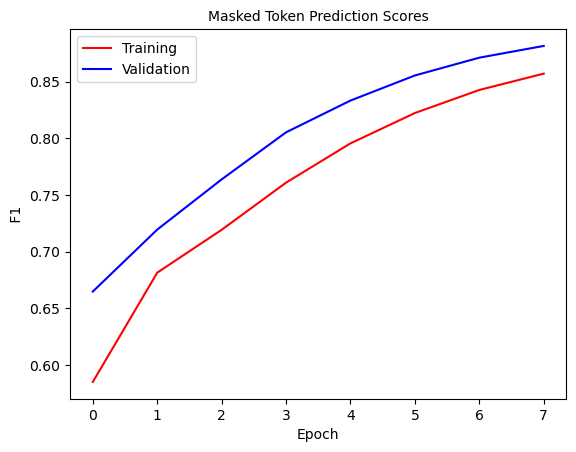

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 8: 100%|██████████████████| 1014/1014 [20:27<00:00,  1.21s/it, loss=0.363]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.954632701572411   Masked Token f1 0.8676153020461013     SEQ F1 0.9707296267294011


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9528926913245344    v_masked_token_ F1:  0.8883337854583189  V SEQ F1:  0.9767913965092571


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


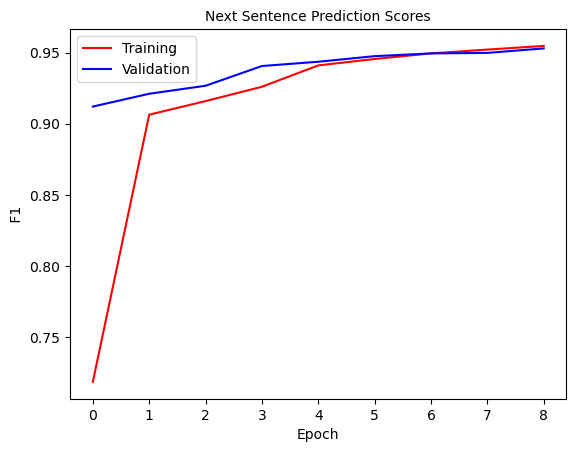

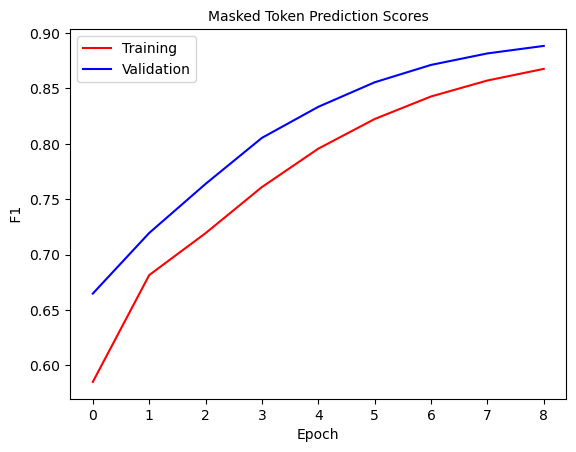

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 9: 100%|██████████████████| 1014/1014 [20:26<00:00,  1.21s/it, loss=0.315]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9566827758539772   Masked Token f1 0.8751311368891741     SEQ F1 0.9736047230986408


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9545502256743991    v_masked_token_ F1:  0.8942128775586096  V SEQ F1:  0.9782903605057417


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


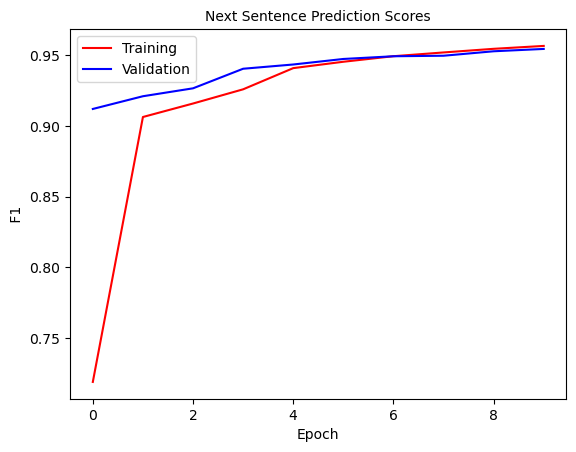

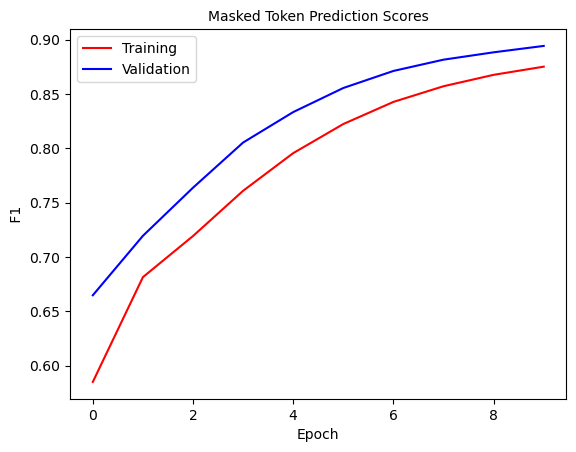

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 10: 100%|█████████████████| 1014/1014 [20:28<00:00,  1.21s/it, loss=0.207]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9594301719876808   Masked Token f1 0.8804071996107714     SEQ F1 0.9753185831164344


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9562441117973411    v_masked_token_ F1:  0.8982046724607888  V SEQ F1:  0.9796435593961584


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


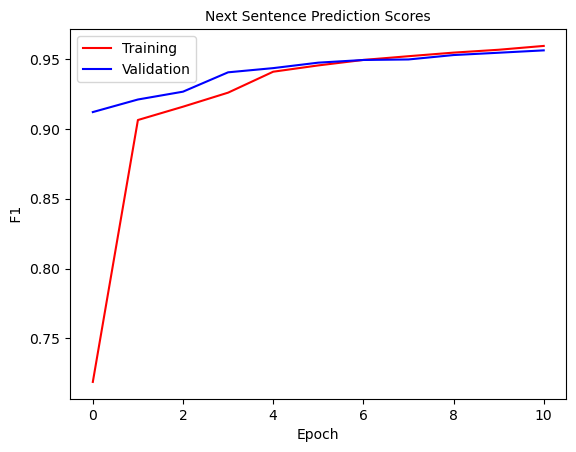

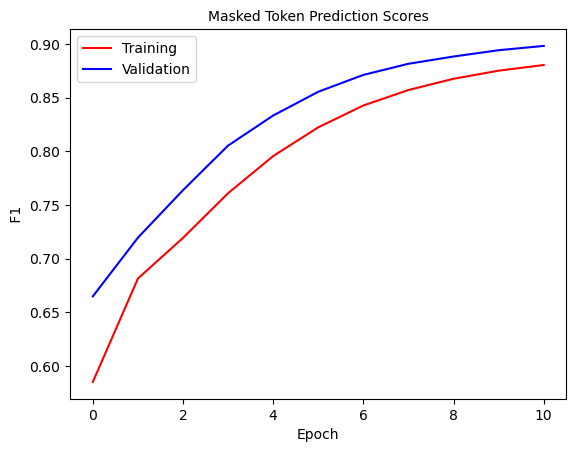

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 11: 100%|█████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.146]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9616251107454753   Masked Token f1 0.8845579860776084     SEQ F1 0.9766359507156952


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9576044129235619    v_masked_token_ F1:  0.9008913579994429  V SEQ F1:  0.9807761875364301


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


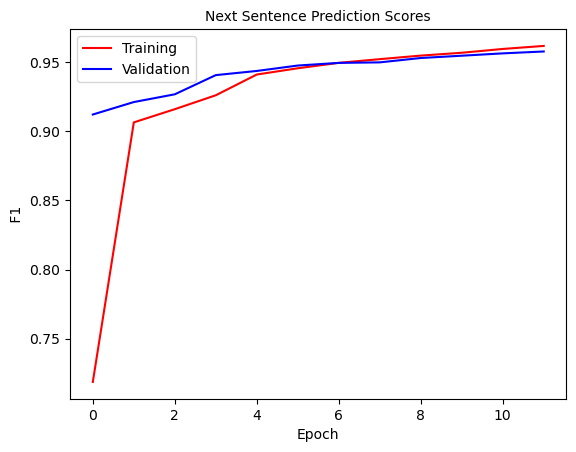

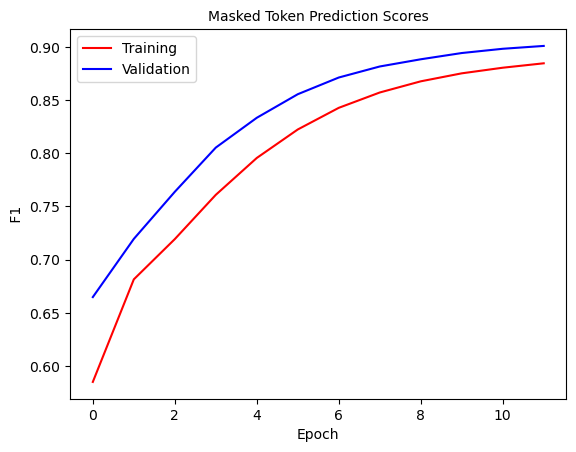

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 12: 100%|█████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.231]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9638630386405017   Masked Token f1 0.8879797570349792     SEQ F1 0.9778181100512648


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9579453917773826    v_masked_token_ F1:  0.904049811356771  V SEQ F1:  0.9817503256605106


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


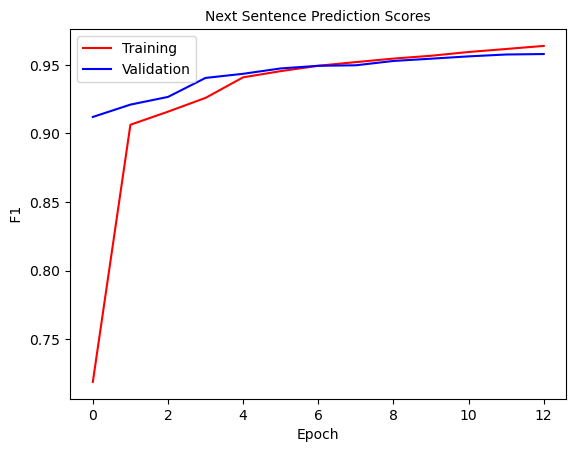

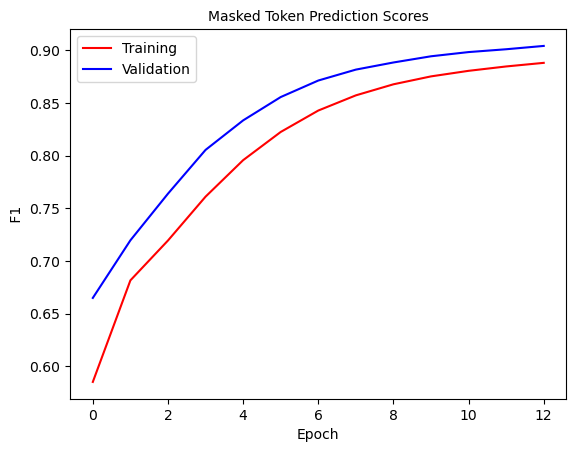

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 13: 100%|██████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.17]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9664280393419441   Masked Token f1 0.8911585430260379     SEQ F1 0.9789016207908808


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9588639102866425    v_masked_token_ F1:  0.9064234674109503  V SEQ F1:  0.9829700620318991


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


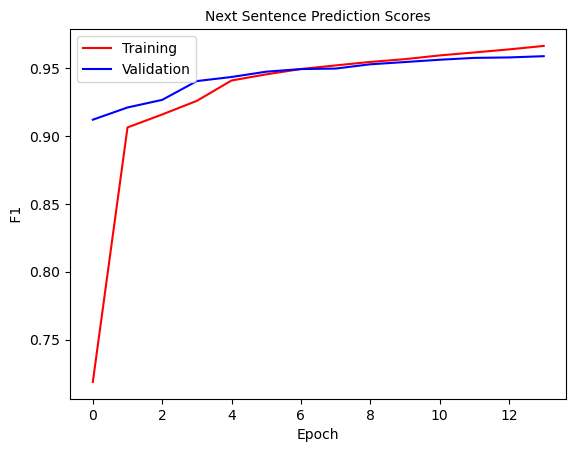

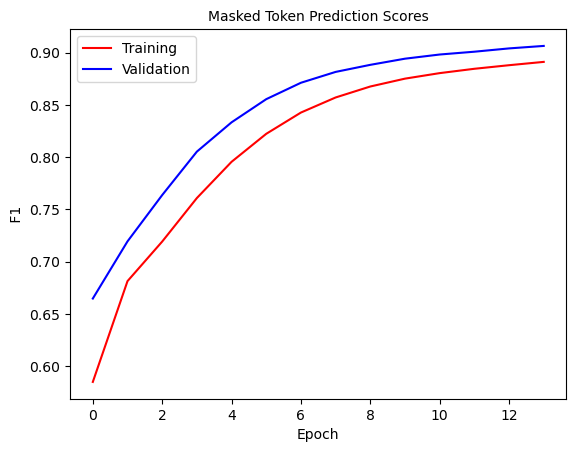

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 14: 100%|█████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.202]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9671000365695263   Masked Token f1 0.8940297642410792     SEQ F1 0.9799868774654221


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:50<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9592627500261808    v_masked_token_ F1:  0.9092483656826652  V SEQ F1:  0.984034996293201


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


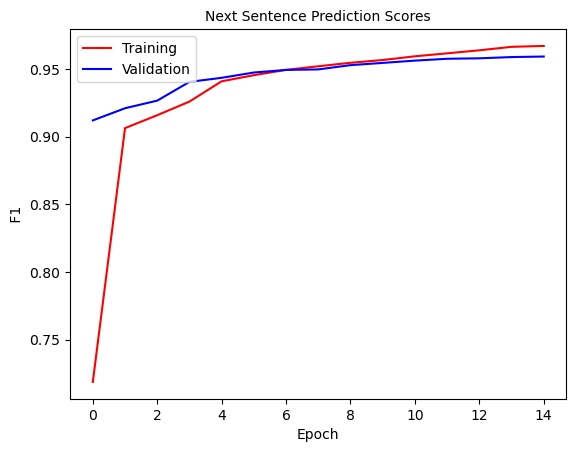

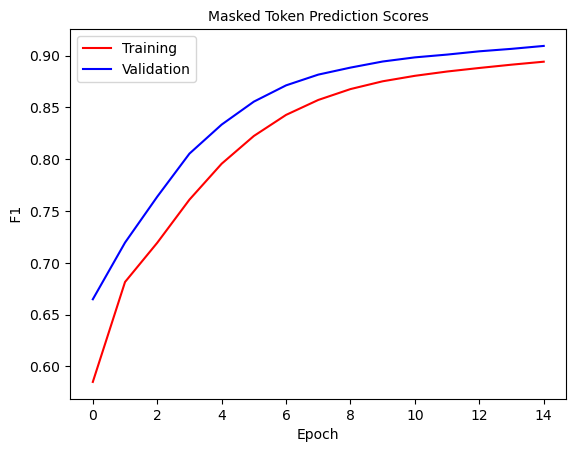

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 15: 100%|█████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.201]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9686909649630991   Masked Token f1 0.896716432256745     SEQ F1 0.9810062545187956


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9578663345786633    v_masked_token_ F1:  0.9113891974078407  V SEQ F1:  0.9848422625849402


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


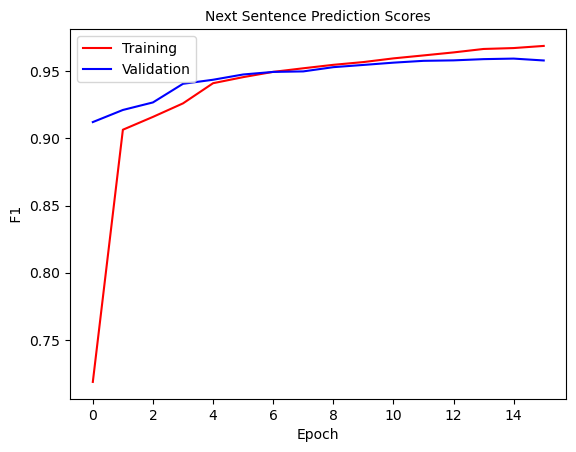

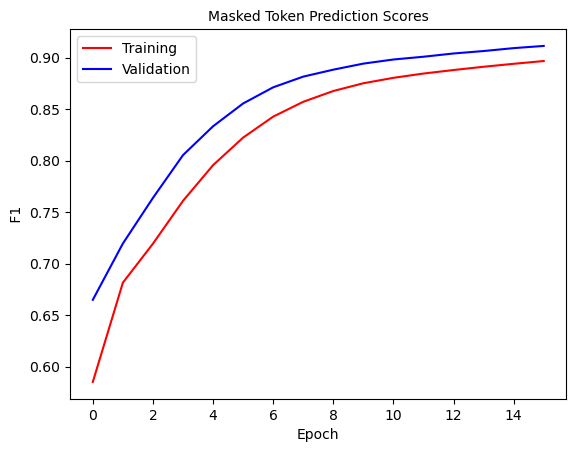

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 16: 100%|█████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.148]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9705319844984649   Masked Token f1 0.8989287675063626     SEQ F1 0.9818746957495698


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9604666909734882    v_masked_token_ F1:  0.9137126802979579  V SEQ F1:  0.9854244376460887


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


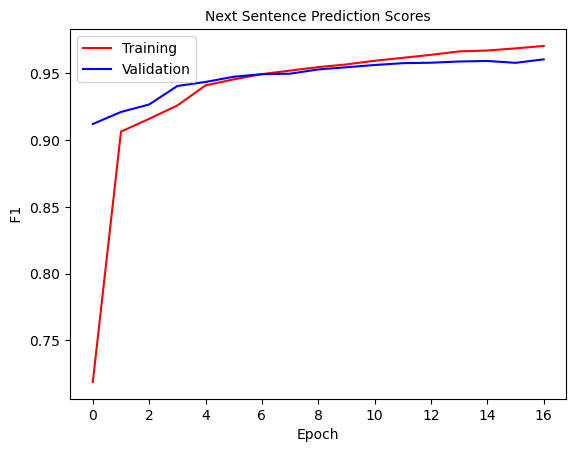

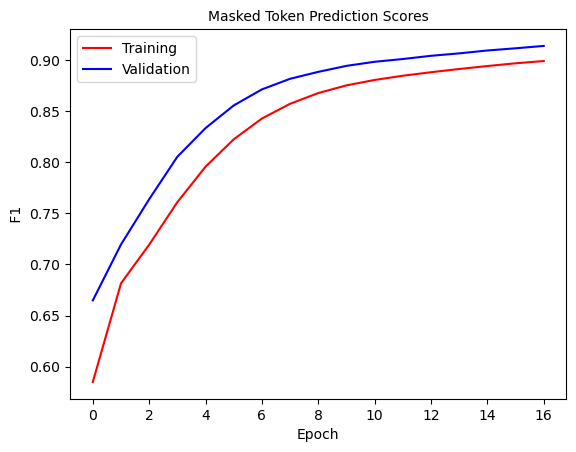

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 17: 100%|█████████████████| 1014/1014 [20:23<00:00,  1.21s/it, loss=0.101]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.971969192496639   Masked Token f1 0.9008526549307055     SEQ F1 0.9826071309384656


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9588425780841952    v_masked_token_ F1:  0.9147865556813001  V SEQ F1:  0.9859383690279421


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


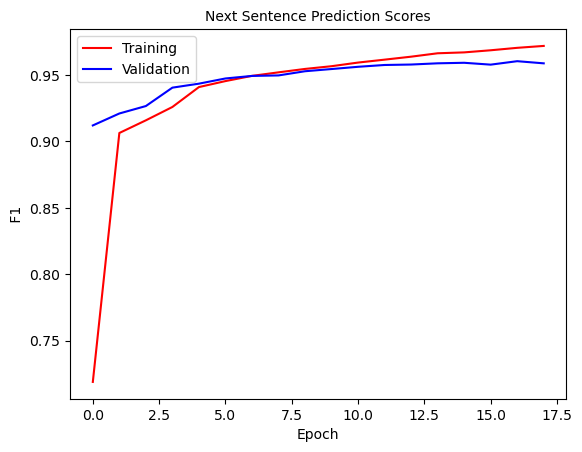

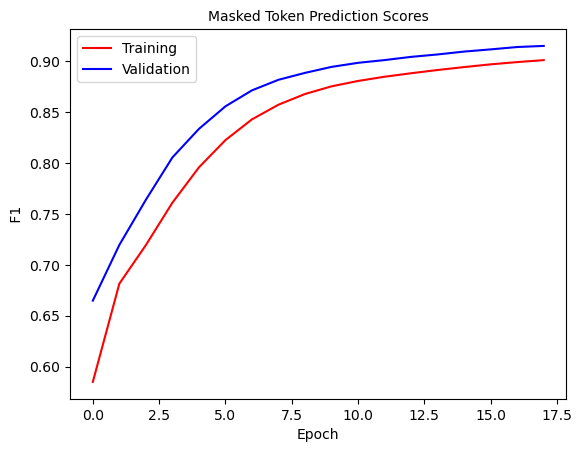

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 18: 100%|█████████████████| 1014/1014 [20:23<00:00,  1.21s/it, loss=0.281]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9735610404928915   Masked Token f1 0.90253066805976     SEQ F1 0.9832946639635456


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:50<00:00,  2.26it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9592092877314089    v_masked_token_ F1:  0.9157246477217278  V SEQ F1:  0.9865725533732852


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


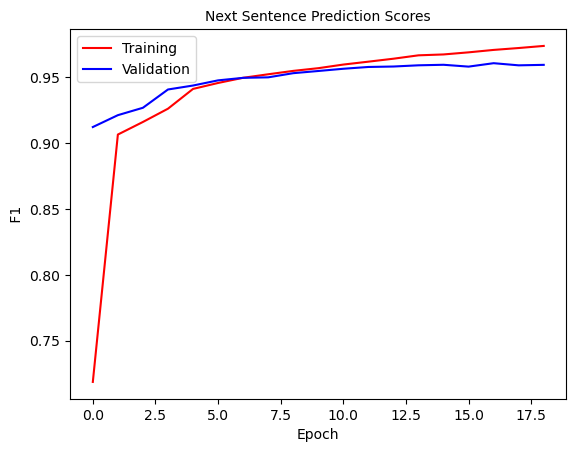

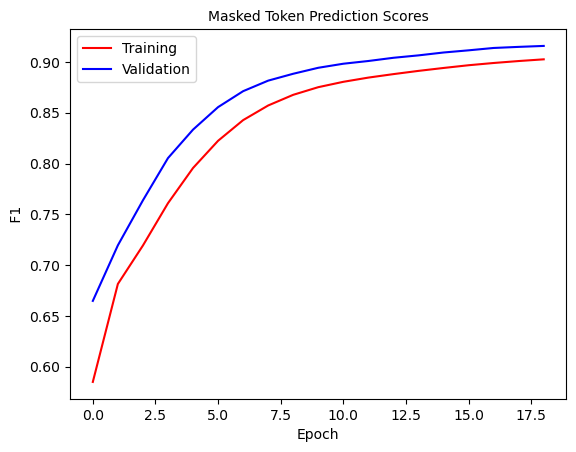

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 19: 100%|█████████████████| 1014/1014 [20:21<00:00,  1.20s/it, loss=0.109]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9747671634681675   Masked Token f1 0.9041560062394569     SEQ F1 0.9838837772099537


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9562115493977149    v_masked_token_ F1:  0.9180157017864576  V SEQ F1:  0.9869992988768975


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


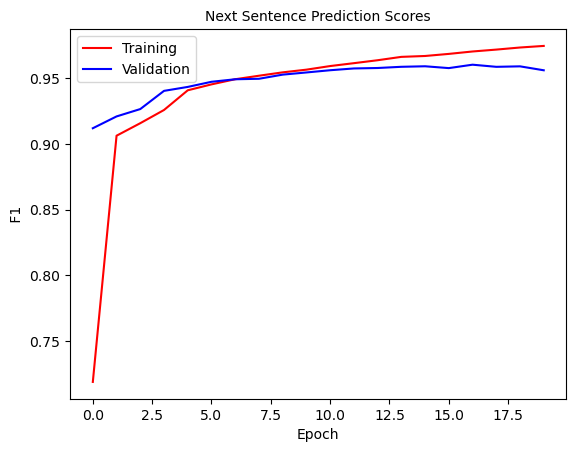

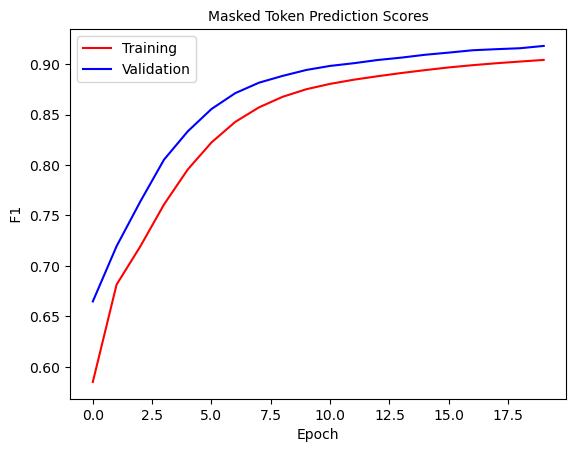

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 20: 100%|█████████████████| 1014/1014 [20:23<00:00,  1.21s/it, loss=0.157]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9750206492628839   Masked Token f1 0.905656947676768     SEQ F1 0.9844024028349119


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9589472028521995    v_masked_token_ F1:  0.9187506775457958  V SEQ F1:  0.9873341581170798


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


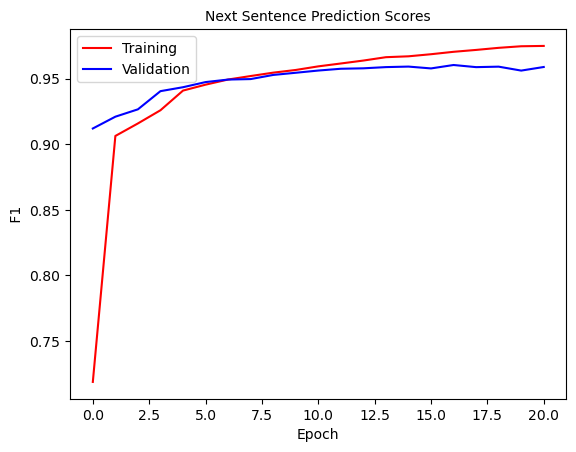

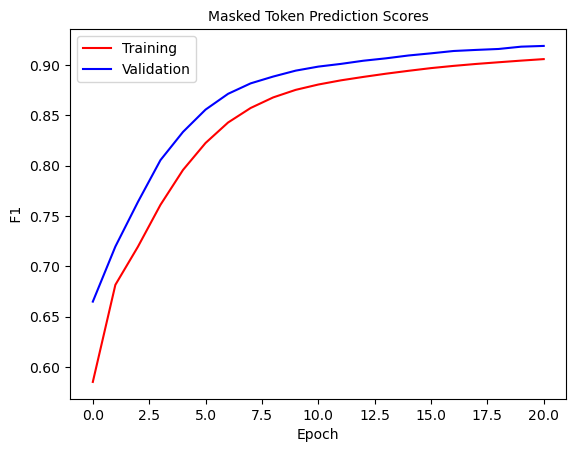

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 21: 100%|█████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.149]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.977002438566873   Masked Token f1 0.9067793921290502     SEQ F1 0.9848299235435218


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9581424406497293    v_masked_token_ F1:  0.9204321305530954  V SEQ F1:  0.9877108002071083


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


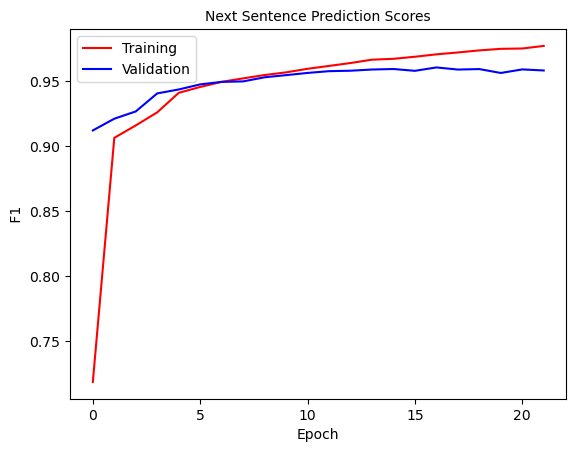

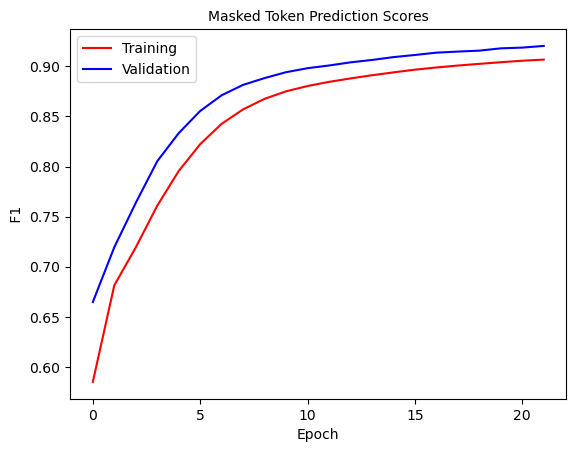

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 22: 100%|█████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.151]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9773096434015544   Masked Token f1 0.9081744886285158     SEQ F1 0.9852341706111803


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.957263190532789    v_masked_token_ F1:  0.9206182929717492  V SEQ F1:  0.9878894454103784


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


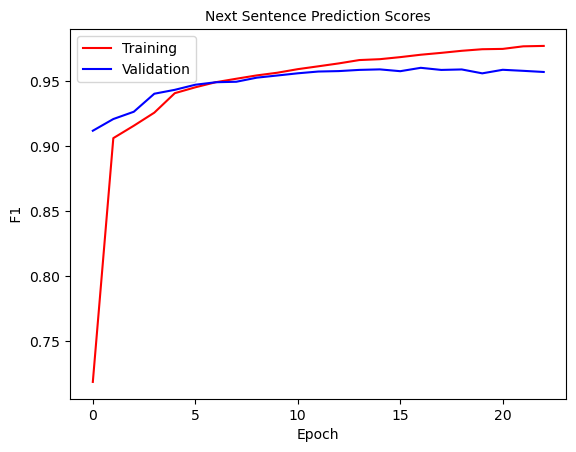

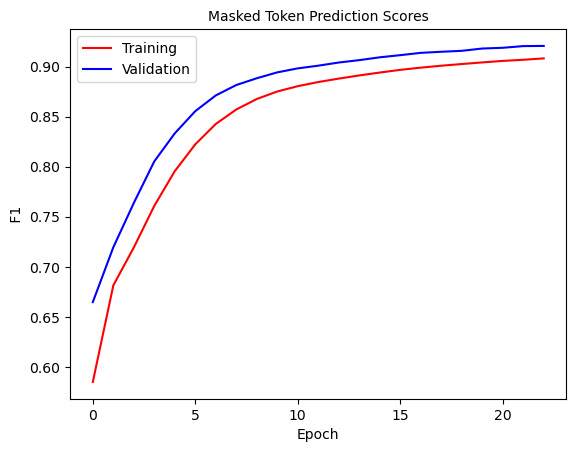

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 23: 100%|█████████████████| 1014/1014 [20:23<00:00,  1.21s/it, loss=0.124]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9792535264011983   Masked Token f1 0.9091947991913459     SEQ F1 0.9856156252391037


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9596883116883117    v_masked_token_ F1:  0.9215707526489578  V SEQ F1:  0.9880750455837807


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


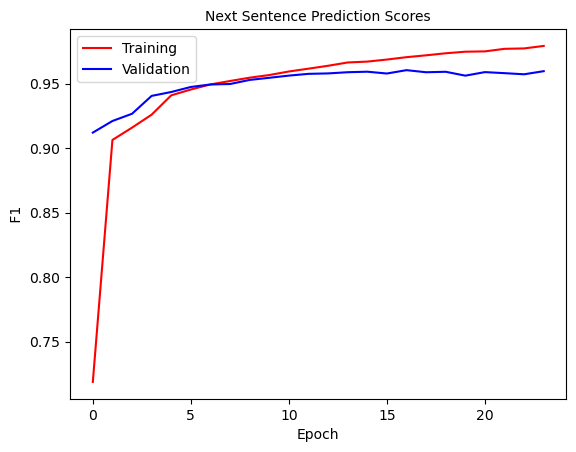

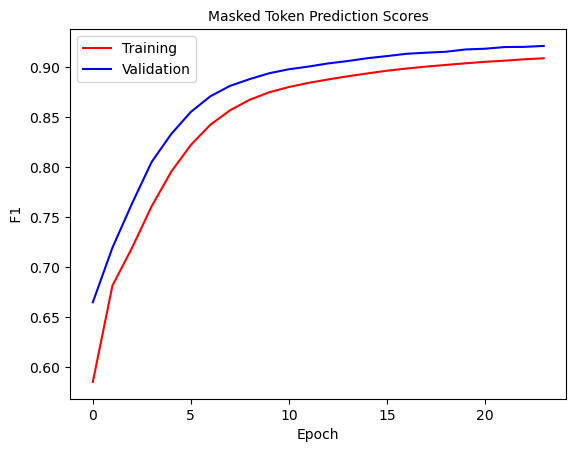

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 24: 100%|█████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.101]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9807745056479565   Masked Token f1 0.910118090243268     SEQ F1 0.9859043372264589


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:50<00:00,  2.26it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9539521019632028    v_masked_token_ F1:  0.9229523588165921  V SEQ F1:  0.9883099049336095


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


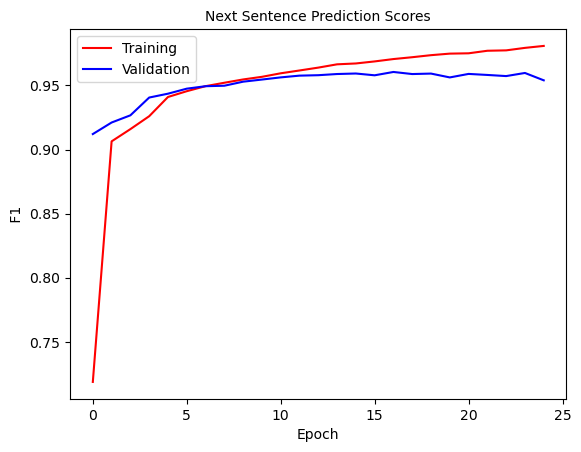

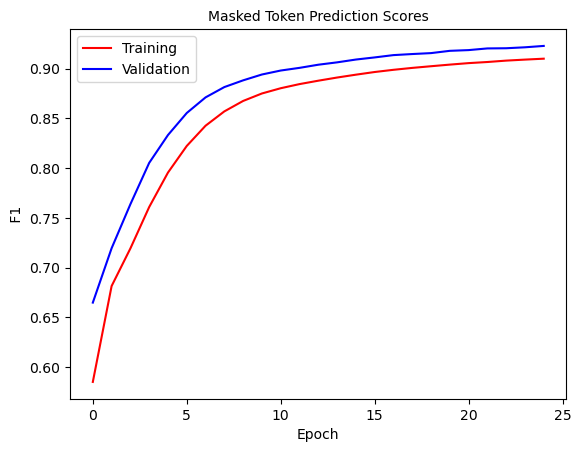

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 25: 100%|█████████████████| 1014/1014 [20:17<00:00,  1.20s/it, loss=0.116]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9819313865886309   Masked Token f1 0.9109200513414485     SEQ F1 0.9861570458706691


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:50<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9602573414963163    v_masked_token_ F1:  0.9236005022512843  V SEQ F1:  0.9884727171480603


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


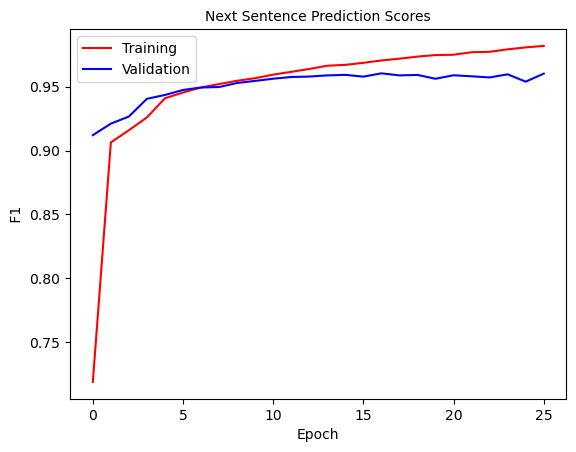

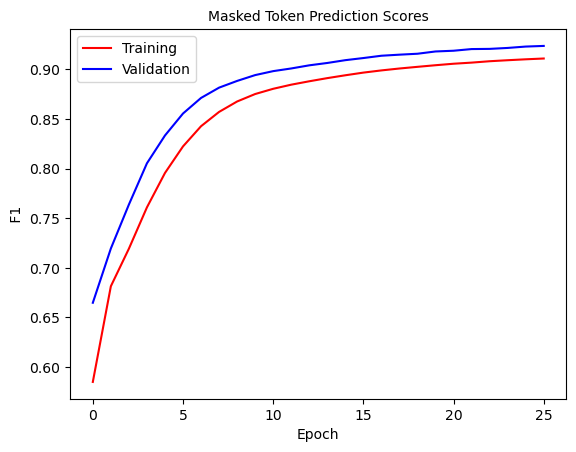

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 26: 100%|█████████████████| 1014/1014 [20:22<00:00,  1.21s/it, loss=0.153]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9827421020542747   Masked Token f1 0.9117926085873389     SEQ F1 0.986389050586357


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9538255861785273    v_masked_token_ F1:  0.9237431595315424  V SEQ F1:  0.9886275575389964


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


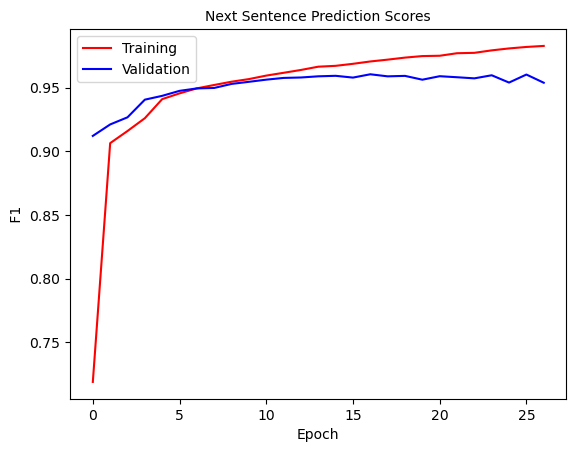

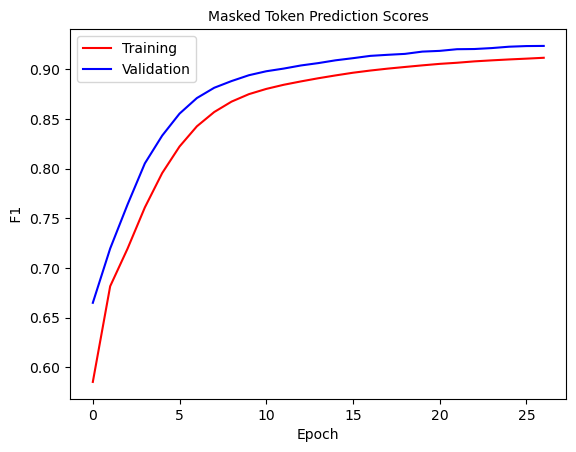

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 27: 100%|█████████████████| 1014/1014 [20:26<00:00,  1.21s/it, loss=0.136]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9837438790982078   Masked Token f1 0.9126071037748651     SEQ F1 0.9866223261819326


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:52<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9493153484569794    v_masked_token_ F1:  0.9246432388457599  V SEQ F1:  0.9887650042648654


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


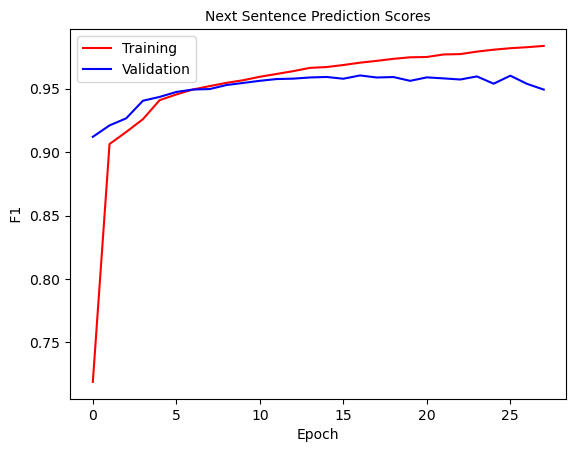

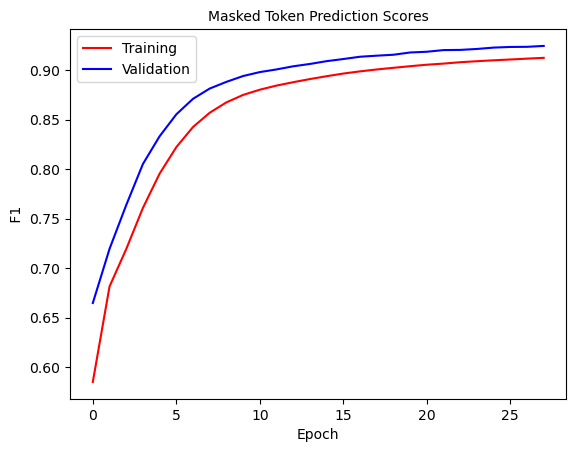

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 28: 100%|████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.0637]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9848721961398018   Masked Token f1 0.9134881778482948     SEQ F1 0.9868088071079737


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9560314504448583    v_masked_token_ F1:  0.9253524300508067  V SEQ F1:  0.9888793801268505


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


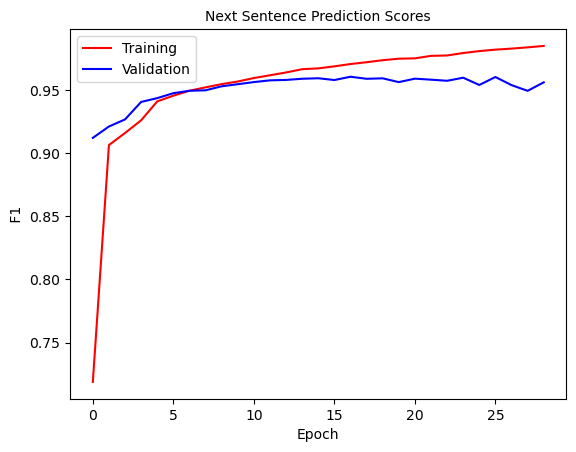

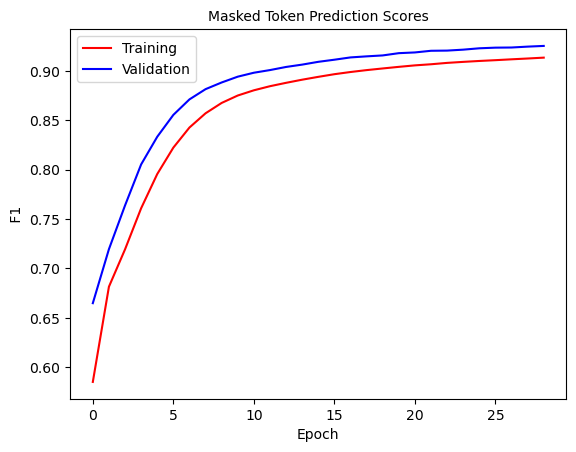

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 29: 100%|█████████████████| 1014/1014 [20:23<00:00,  1.21s/it, loss=0.104]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9856094562882579   Masked Token f1 0.914128443075668     SEQ F1 0.9869652364970534


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:50<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.954097175607993    v_masked_token_ F1:  0.9258898388906078  V SEQ F1:  0.9889845928532668


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


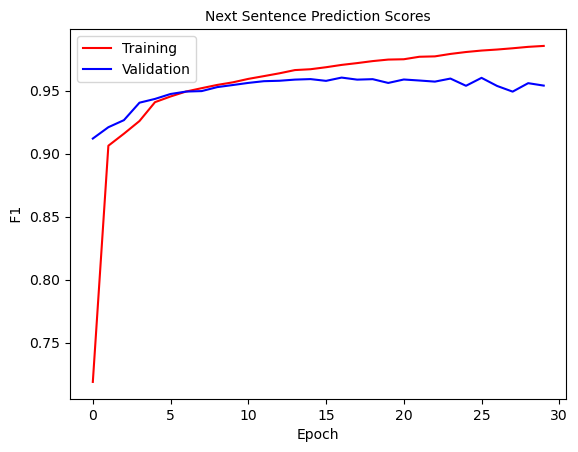

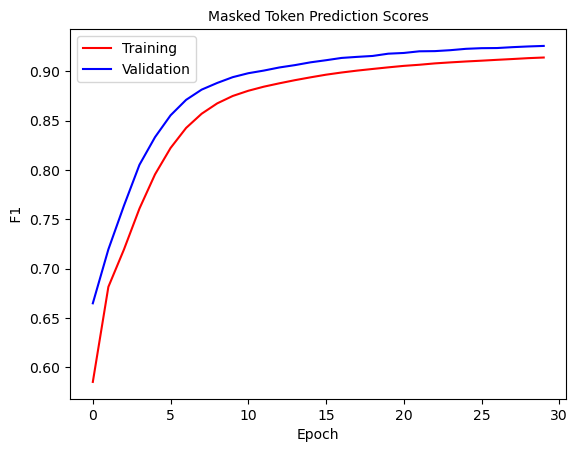

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 30: 100%|████████████████| 1014/1014 [20:21<00:00,  1.20s/it, loss=0.0773]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9864338682076338   Masked Token f1 0.9147876791271544     SEQ F1 0.9871381391759158


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9547707558859975    v_masked_token_ F1:  0.9266789581267104  V SEQ F1:  0.9891463375309708


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


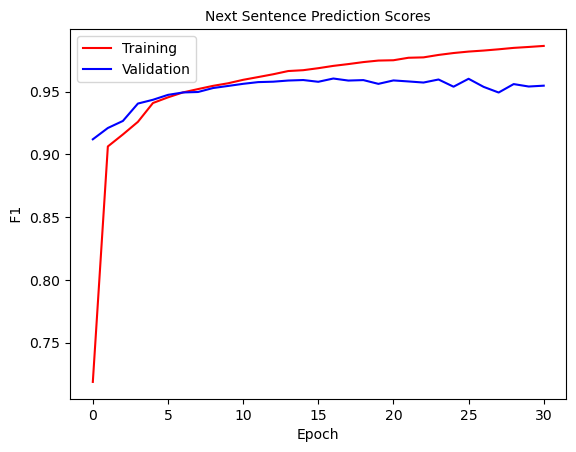

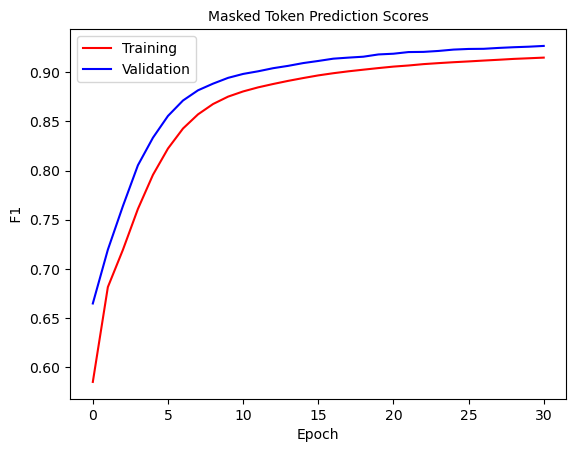

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 31: 100%|█████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.111]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9877714866254507   Masked Token f1 0.9155629791522041     SEQ F1 0.98727491563136


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9576398610463006    v_masked_token_ F1:  0.9274511393700179  V SEQ F1:  0.9891883520785487


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


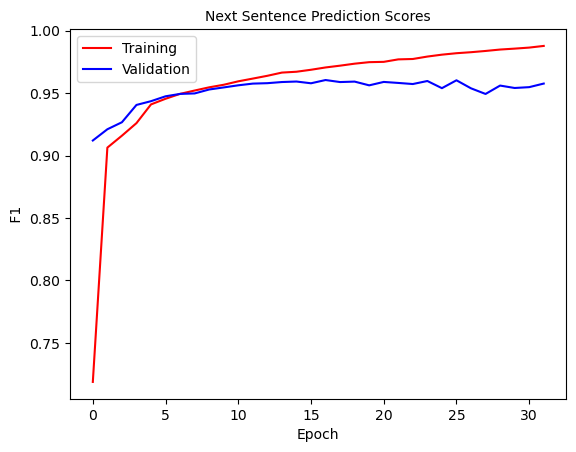

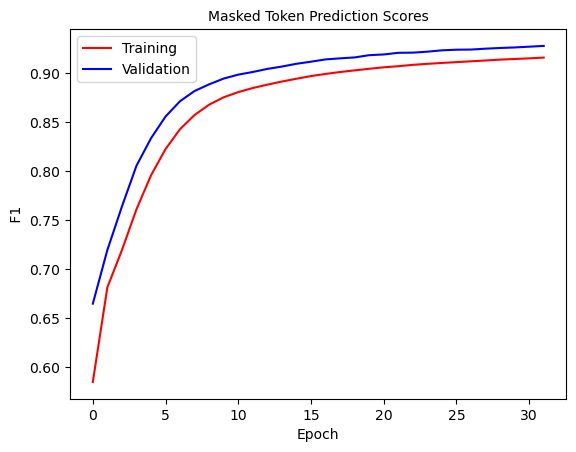

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 32: 100%|█████████████████| 1014/1014 [20:21<00:00,  1.20s/it, loss=0.072]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9881263387274506   Masked Token f1 0.9160772800642154     SEQ F1 0.9873897798508879


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.959691698781377    v_masked_token_ F1:  0.9278103802151798  V SEQ F1:  0.9892592609970818


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


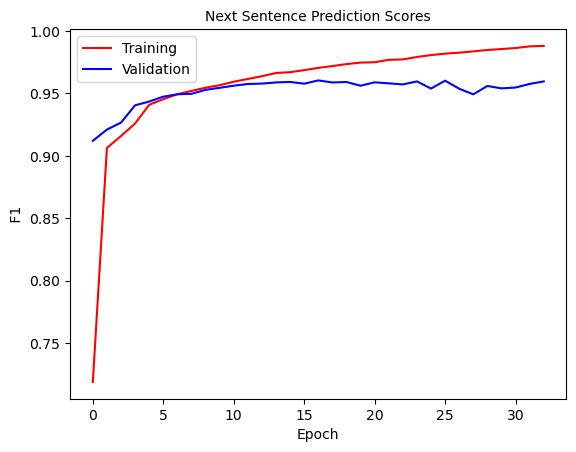

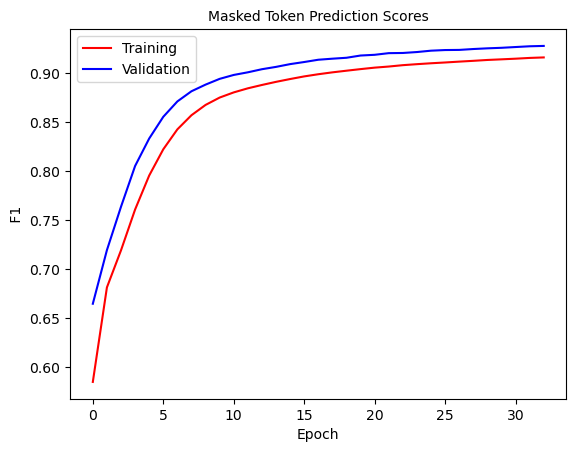

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 33: 100%|█████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.212]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9885910857029723   Masked Token f1 0.9167819620847192     SEQ F1 0.9875152069368817


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9572295090466069    v_masked_token_ F1:  0.9285472433562595  V SEQ F1:  0.9894007451667847


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


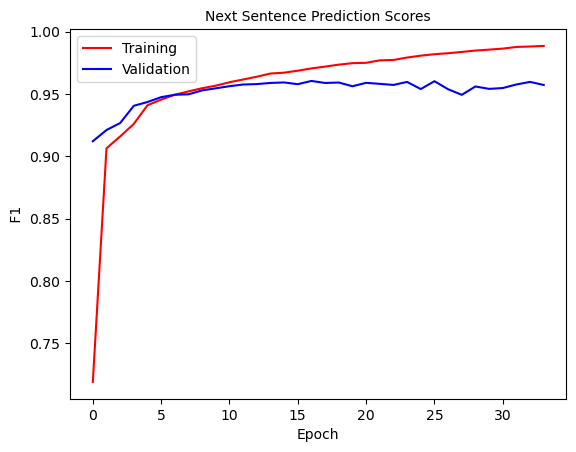

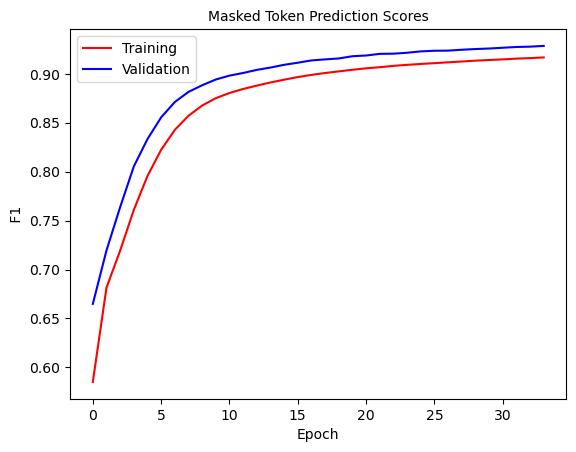

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 34: 100%|█████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.115]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9896249397158297   Masked Token f1 0.9175467638083272     SEQ F1 0.987659052830005


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9534201451438571    v_masked_token_ F1:  0.9289139007835114  V SEQ F1:  0.9895146101124261


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


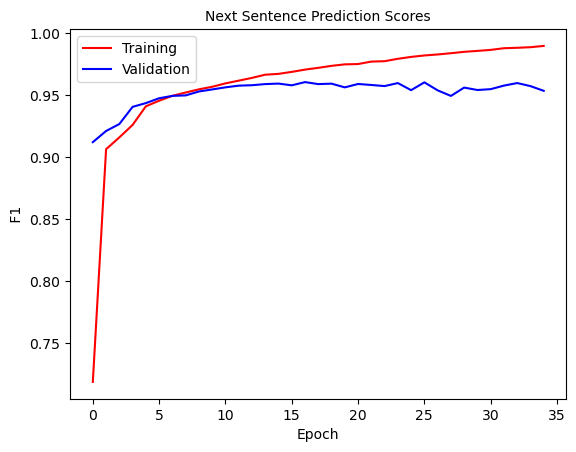

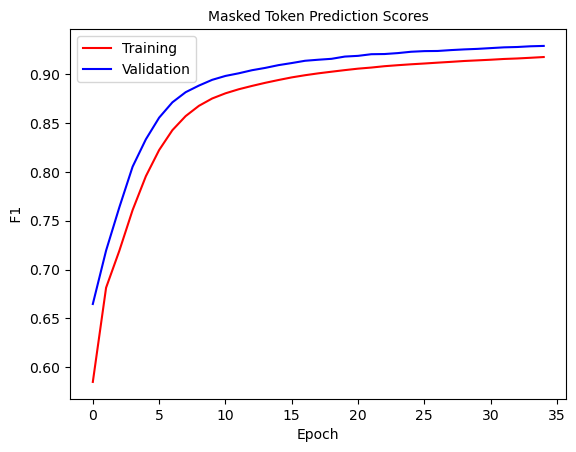

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 35: 100%|█████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.139]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9901768172888016   Masked Token f1 0.9180445085419158     SEQ F1 0.9877679854158185


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9537828100874935    v_masked_token_ F1:  0.9295045612335291  V SEQ F1:  0.9895797482338212


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


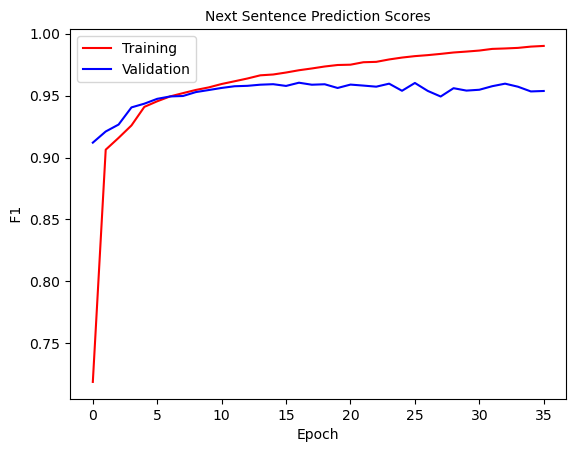

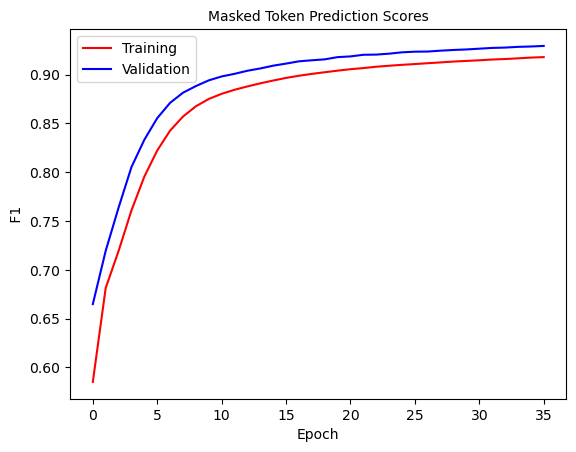

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 36: 100%|█████████████████| 1014/1014 [20:28<00:00,  1.21s/it, loss=0.113]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9911430089064025   Masked Token f1 0.9183497319005798     SEQ F1 0.9878427838499165


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9564540405875331    v_masked_token_ F1:  0.9298081961365673  V SEQ F1:  0.9896274286240224


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


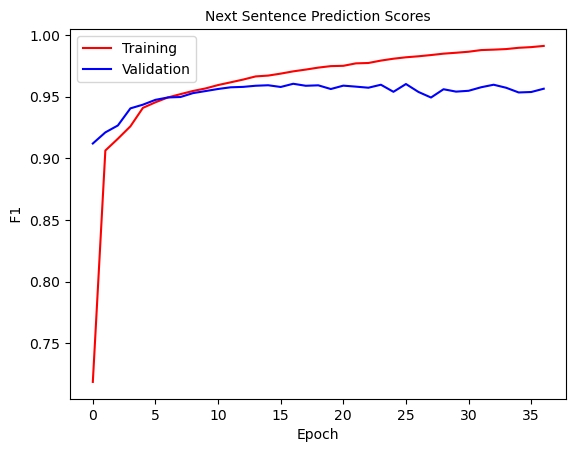

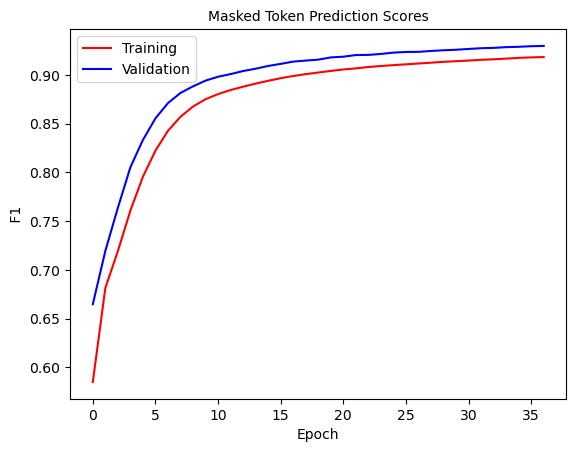

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 37: 100%|████████████████| 1014/1014 [20:27<00:00,  1.21s/it, loss=0.0681]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9914048606994665   Masked Token f1 0.9189995330797085     SEQ F1 0.9879432679773043


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9538525140819596    v_masked_token_ F1:  0.9300429511822553  V SEQ F1:  0.9896838534162538


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


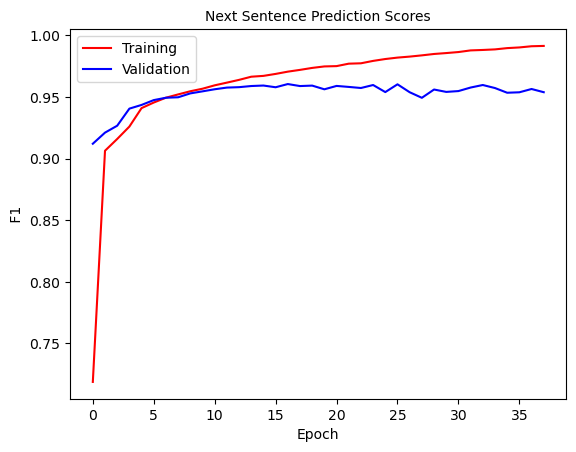

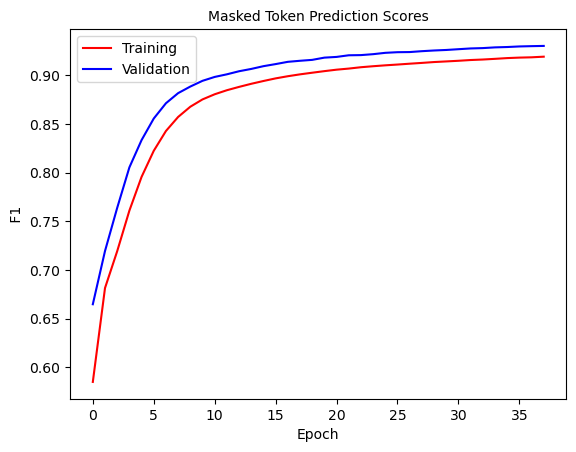

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 38: 100%|█████████████████| 1014/1014 [20:28<00:00,  1.21s/it, loss=0.056]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9926090443580726   Masked Token f1 0.9194706434987213     SEQ F1 0.9880529370362676


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9492998057855464    v_masked_token_ F1:  0.9303798055412742  V SEQ F1:  0.9897291430315611


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


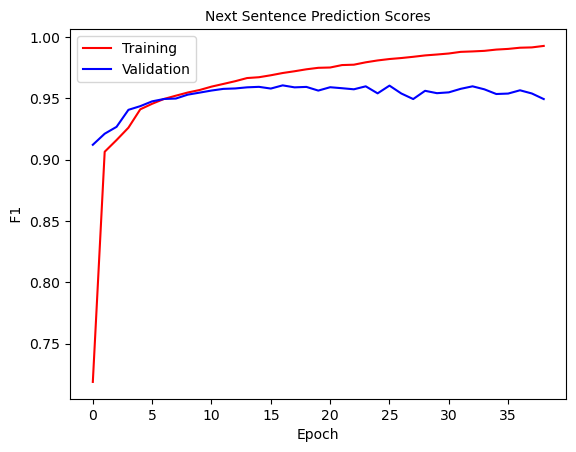

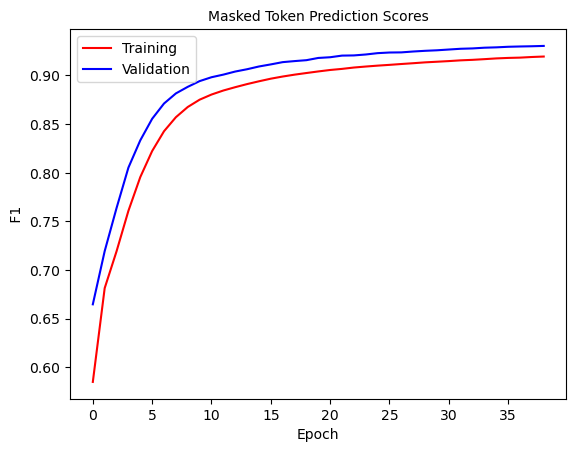

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 39: 100%|████████████████| 1014/1014 [20:26<00:00,  1.21s/it, loss=0.0622]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9928946784101843   Masked Token f1 0.9198581254391369     SEQ F1 0.9881260154714786


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9514633140972795    v_masked_token_ F1:  0.9312562714064816  V SEQ F1:  0.9898309584277568


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


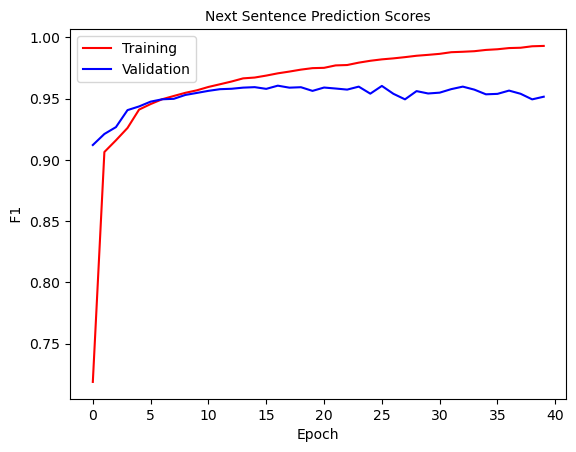

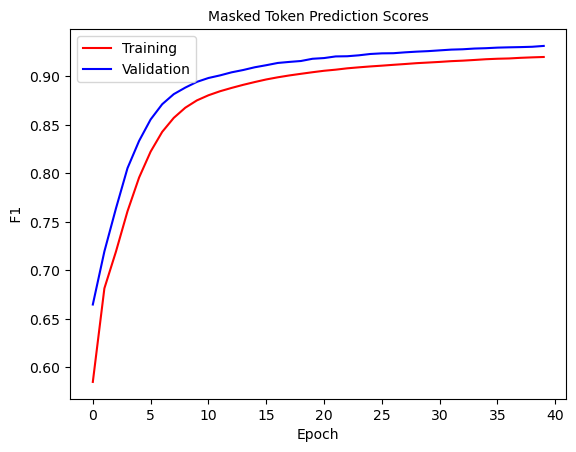

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 40: 100%|████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.0541]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9936982821344449   Masked Token f1 0.920566873136229     SEQ F1 0.9882392919671996


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9504798070508544    v_masked_token_ F1:  0.9312973386473974  V SEQ F1:  0.989888079505723


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


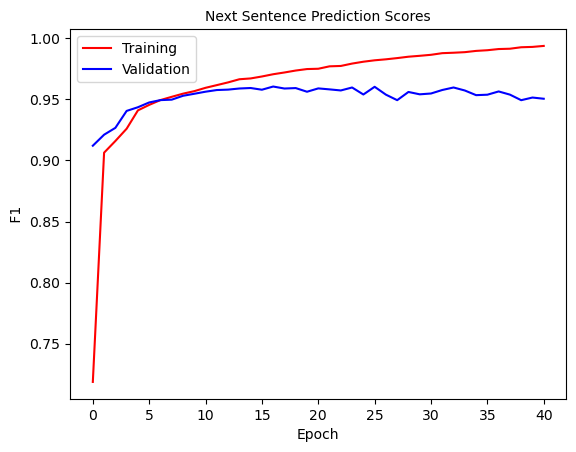

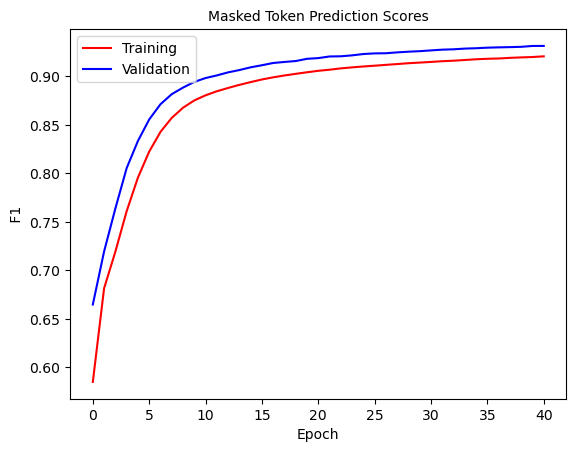

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 41: 100%|████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.0543]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9934389028661634   Masked Token f1 0.920979649242688     SEQ F1 0.9883167017531892


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9469910371318822    v_masked_token_ F1:  0.9318922509937274  V SEQ F1:  0.9899795770607396


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


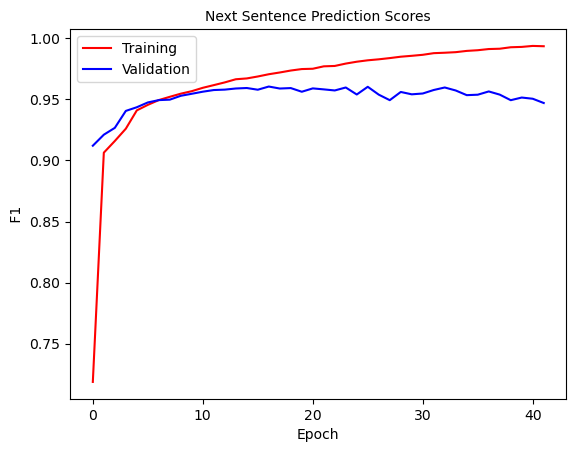

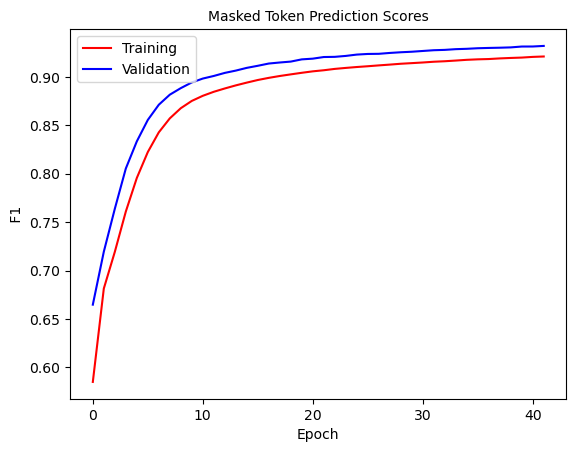

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 42: 100%|████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.0713]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9942686699616679   Masked Token f1 0.9214948547253823     SEQ F1 0.9884072905339201


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9556384742951907    v_masked_token_ F1:  0.9325631624568  V SEQ F1:  0.9900635286720932


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


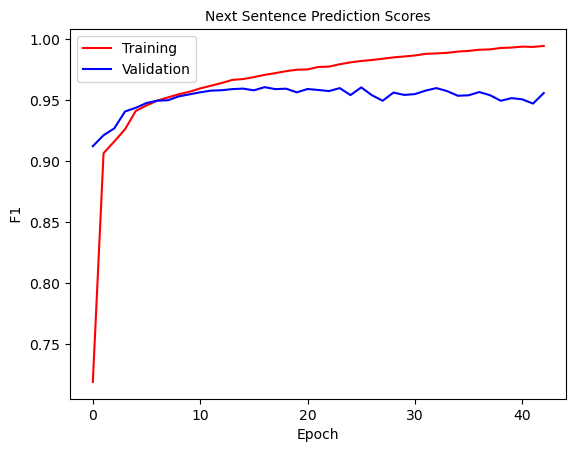

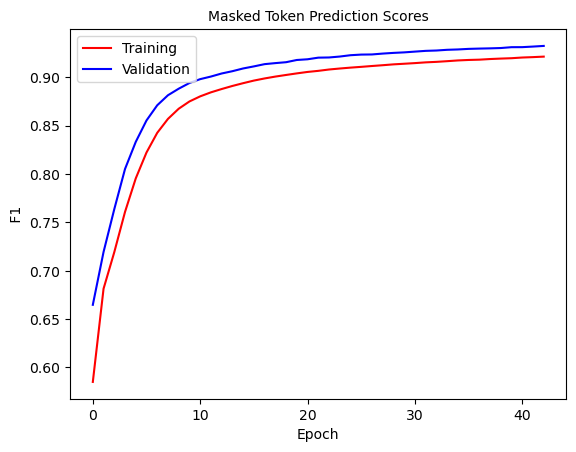

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 43: 100%|████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.0696]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.994676393749692   Masked Token f1 0.9218899362301701     SEQ F1 0.9884693895103949


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9535555784910723    v_masked_token_ F1:  0.9327098110498184  V SEQ F1:  0.9900998102829246


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


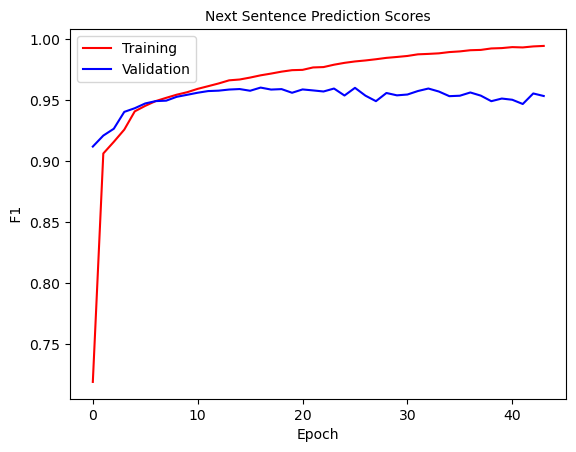

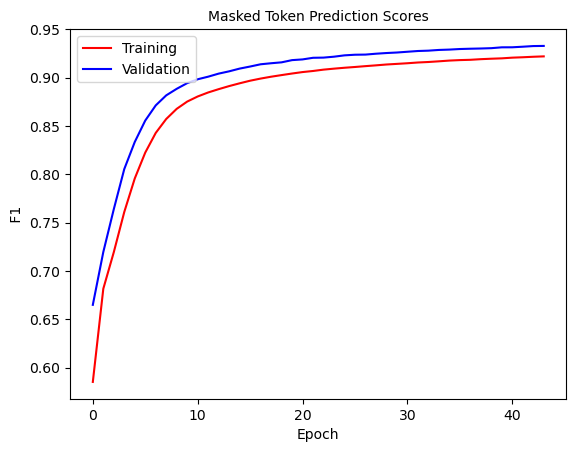

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 44: 100%|█████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.143]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9951331304444253   Masked Token f1 0.9223551553143511     SEQ F1 0.9885597152608849


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:52<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9473469803442306    v_masked_token_ F1:  0.9332767407771309  V SEQ F1:  0.9901605152897147


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


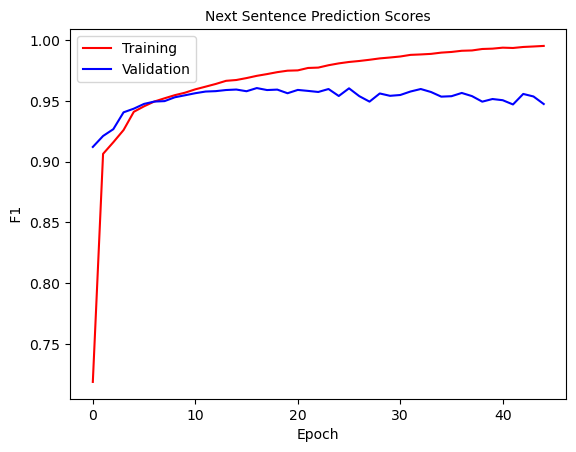

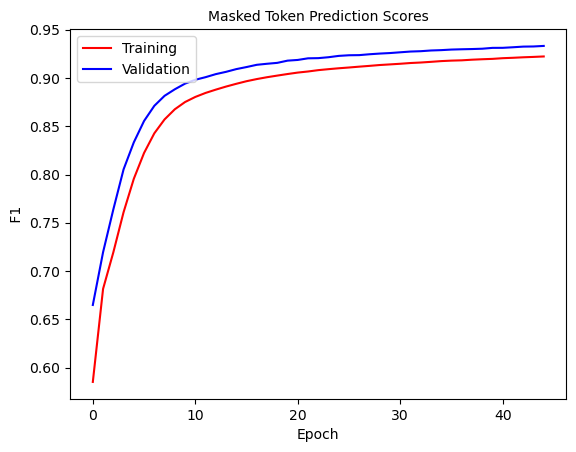

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 45: 100%|████████████████| 1014/1014 [20:26<00:00,  1.21s/it, loss=0.0608]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9954668637595467   Masked Token f1 0.9228941377575131     SEQ F1 0.988647362224205


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:52<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9523318732285494    v_masked_token_ F1:  0.9338719736439258  V SEQ F1:  0.990251945788088


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


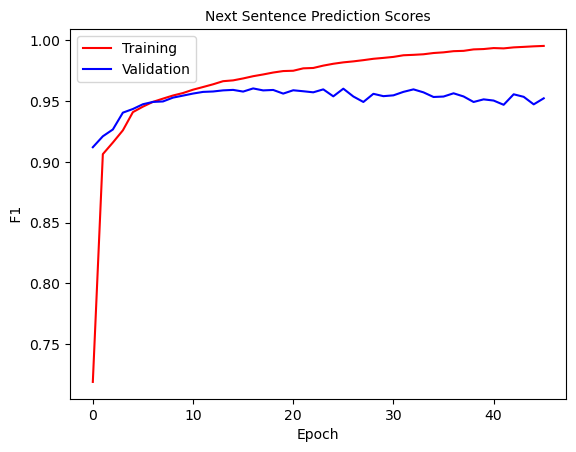

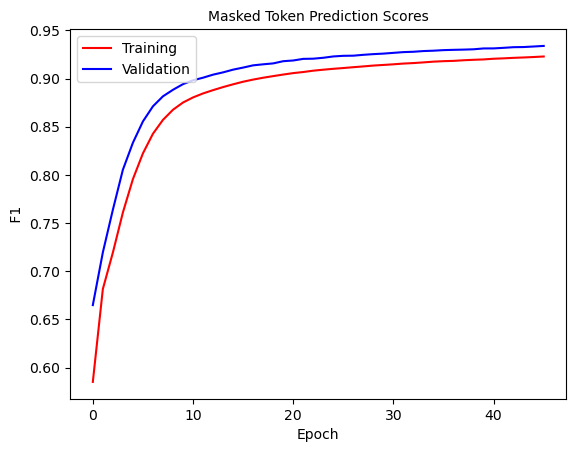

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 46: 100%|████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.0524]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9955654101995566   Masked Token f1 0.9233769773068586     SEQ F1 0.9887363722519277


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:52<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9507877046235952    v_masked_token_ F1:  0.9333313129707488  V SEQ F1:  0.9902257342555825


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


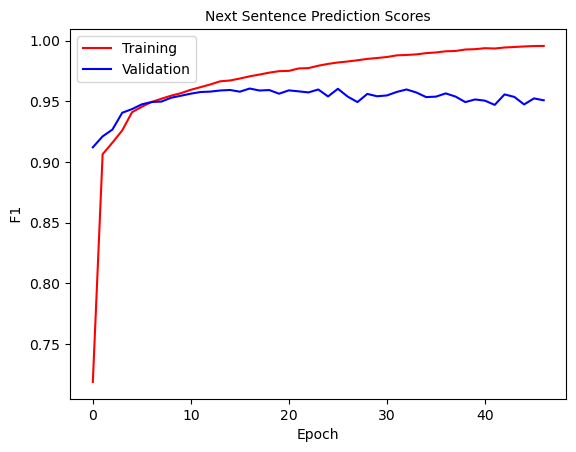

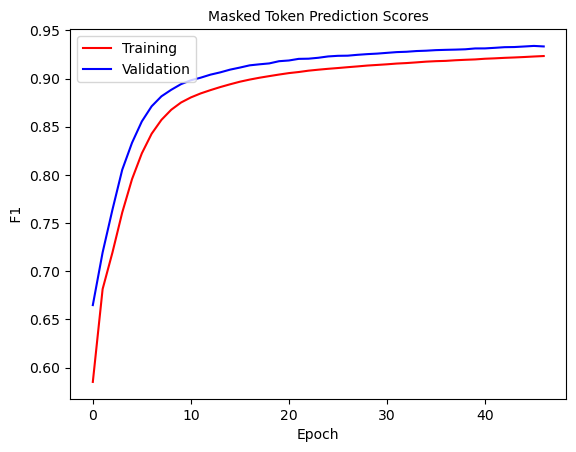

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 47: 100%|████████████████| 1014/1014 [20:26<00:00,  1.21s/it, loss=0.0483]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9957880735978719   Masked Token f1 0.9237336531009479     SEQ F1 0.9888097955384938


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:52<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9498610110161639    v_masked_token_ F1:  0.9342673652713286  V SEQ F1:  0.9903395903172116


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


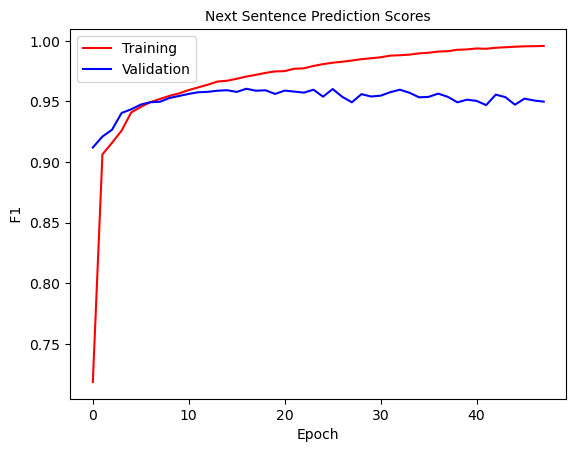

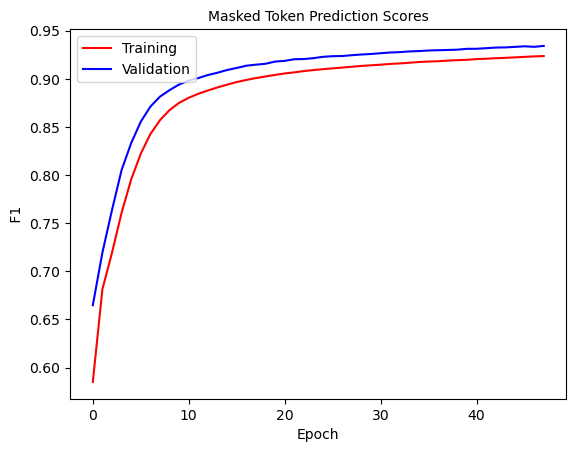

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 48: 100%|████████████████| 1014/1014 [20:27<00:00,  1.21s/it, loss=0.0909]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9959486251185242   Masked Token f1 0.924253069838984     SEQ F1 0.9888909460594338


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.952292728114868    v_masked_token_ F1:  0.9344557746589236  V SEQ F1:  0.9903908691599124


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


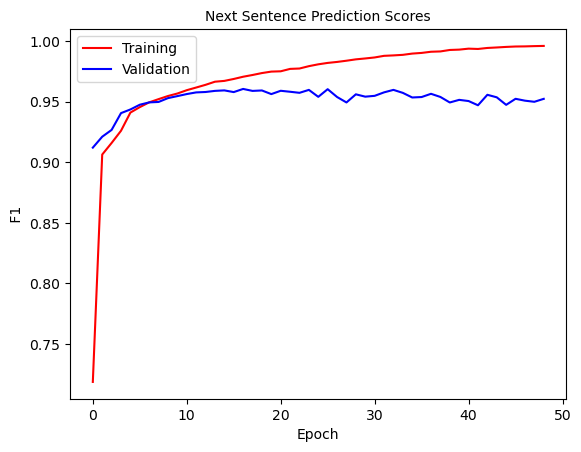

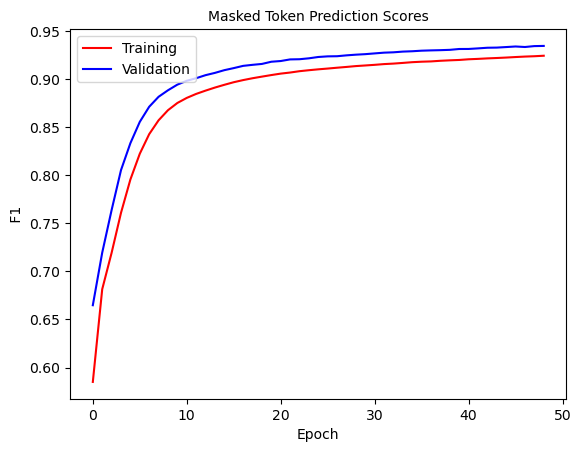

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 49: 100%|████████████████| 1014/1014 [20:27<00:00,  1.21s/it, loss=0.0712]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9962936055460467   Masked Token f1 0.924660521829268     SEQ F1 0.9889603778797861


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9534907703413427    v_masked_token_ F1:  0.9351596353903889  V SEQ F1:  0.9904883676991969


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


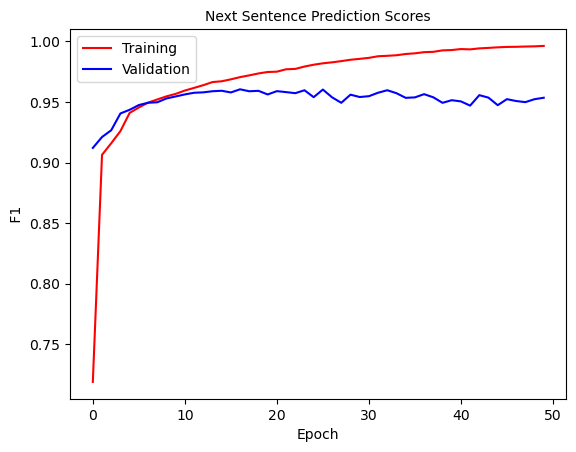

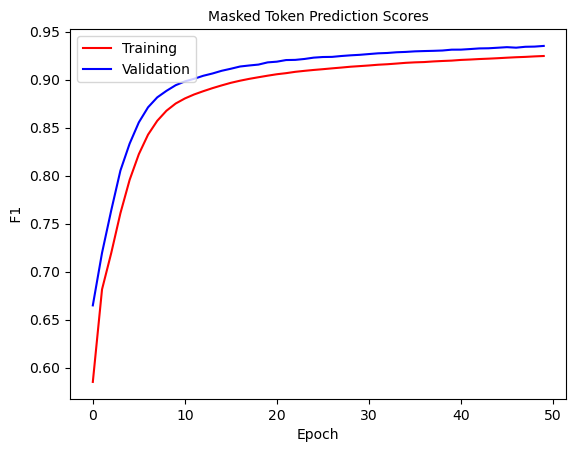

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 50: 100%|████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.0519]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9961590545365013   Masked Token f1 0.9251441685543055     SEQ F1 0.9890287400778774


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9561212873848701    v_masked_token_ F1:  0.935656309661954  V SEQ F1:  0.9905860910403003


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


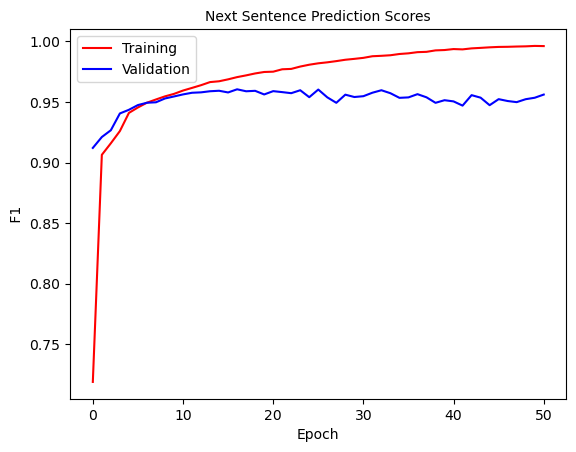

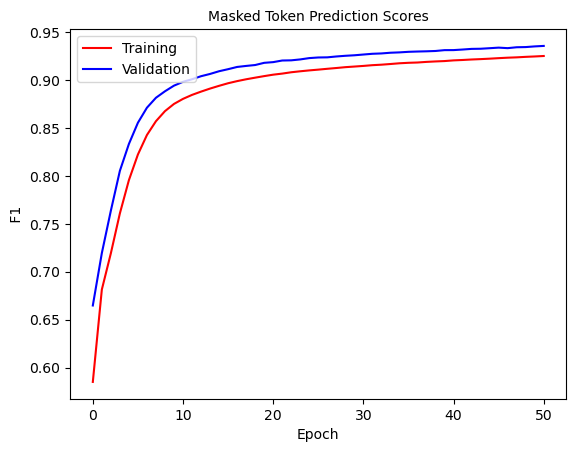

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 51: 100%|████████████████| 1014/1014 [20:23<00:00,  1.21s/it, loss=0.0542]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9963805584281282   Masked Token f1 0.9256389473306328     SEQ F1 0.9891135319586608


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9524251805985552    v_masked_token_ F1:  0.9357510084049026  V SEQ F1:  0.9905881224983114


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


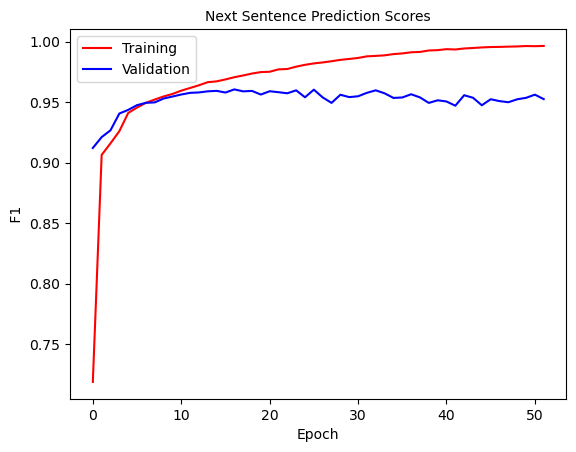

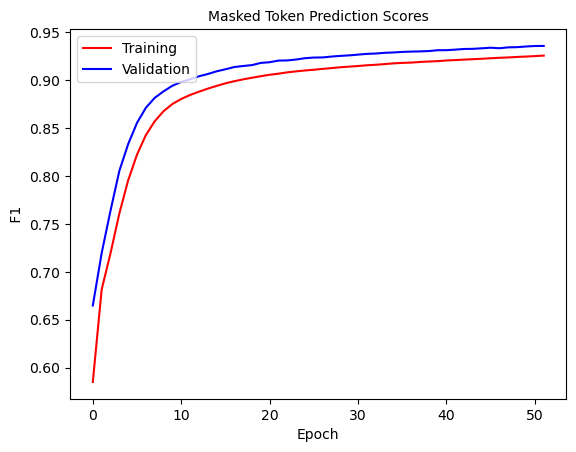

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 52: 100%|████████████████| 1014/1014 [20:23<00:00,  1.21s/it, loss=0.0436]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9965404739919975   Masked Token f1 0.9260725270115077     SEQ F1 0.9891649465731946


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9563510511906607    v_masked_token_ F1:  0.9362659009010115  V SEQ F1:  0.990646776903459


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


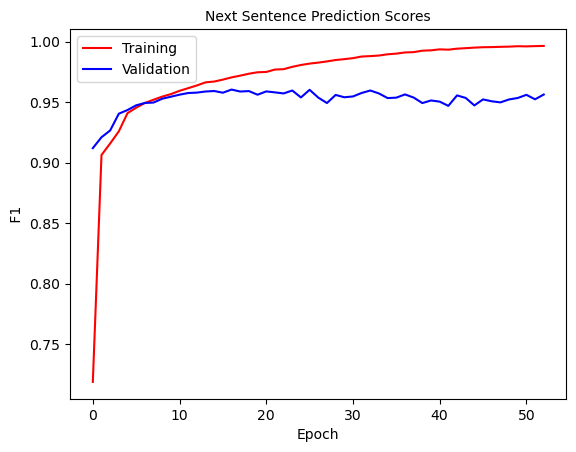

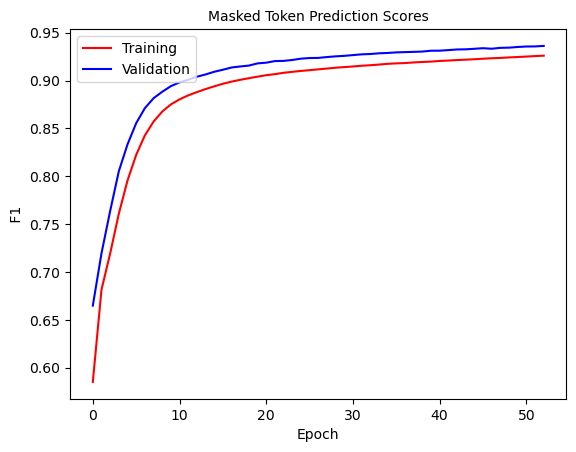

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 53: 100%|████████████████| 1014/1014 [20:22<00:00,  1.21s/it, loss=0.0685]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.997316526748566   Masked Token f1 0.9265711066714231     SEQ F1 0.9892524593290943


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9505601809024565    v_masked_token_ F1:  0.9364475834492835  V SEQ F1:  0.9906760639722549


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


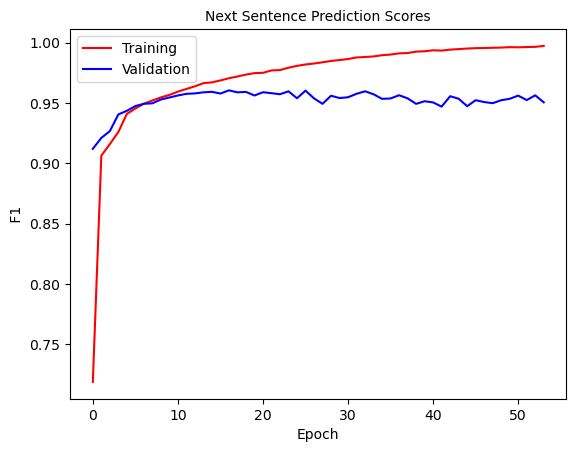

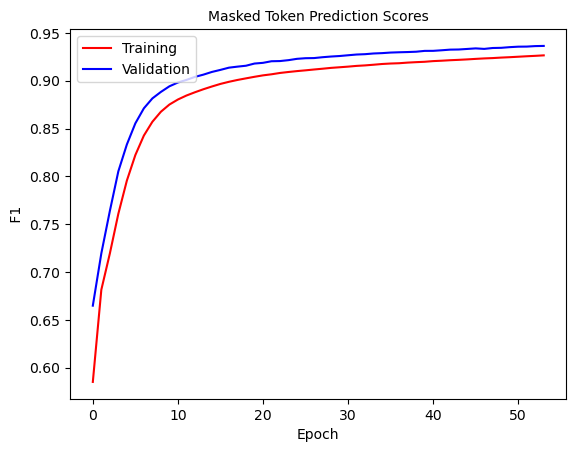

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 54: 100%|████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.0436]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9971313544193148   Masked Token f1 0.9267978533693209     SEQ F1 0.9892879377827227


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.952356372270686    v_masked_token_ F1:  0.9370115080185435  V SEQ F1:  0.9907378073429769


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


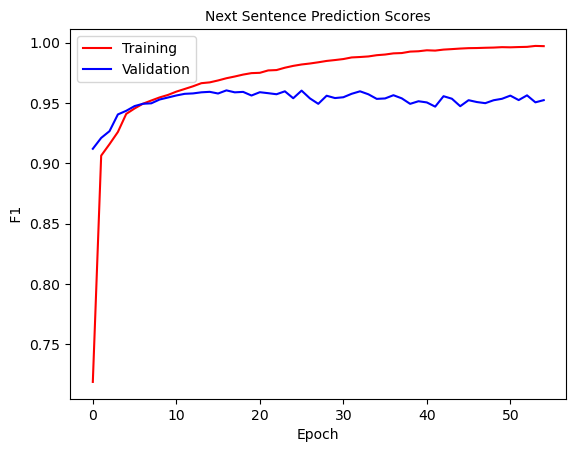

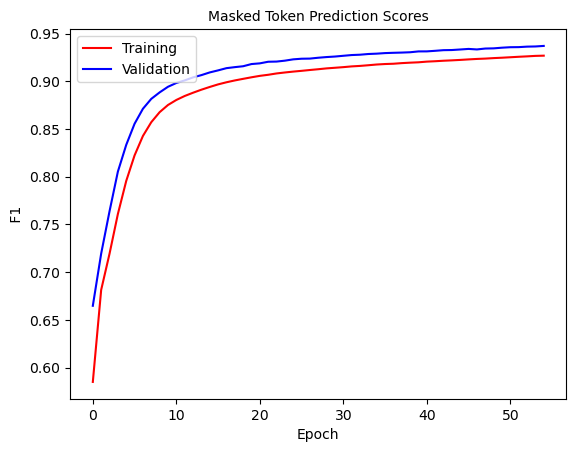

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 55: 100%|█████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.124]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9974153209925167   Masked Token f1 0.9274115947062616     SEQ F1 0.9893708982283432


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9583290142013061    v_masked_token_ F1:  0.9375059161728022  V SEQ F1:  0.9908342248672681


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


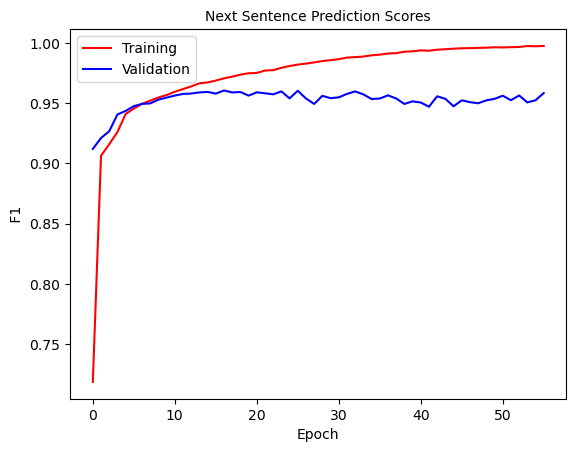

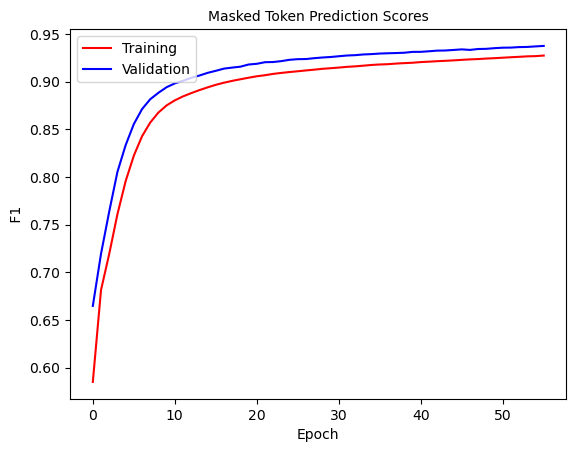

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 56: 100%|████████████████| 1014/1014 [20:26<00:00,  1.21s/it, loss=0.0453]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9974279139028022   Masked Token f1 0.9277861489355266     SEQ F1 0.9894281687057552


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:52<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9536273701566365    v_masked_token_ F1:  0.9380001530501949  V SEQ F1:  0.9908836798999083


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


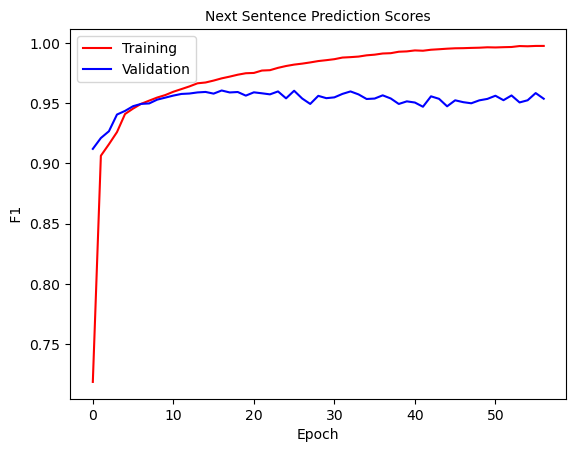

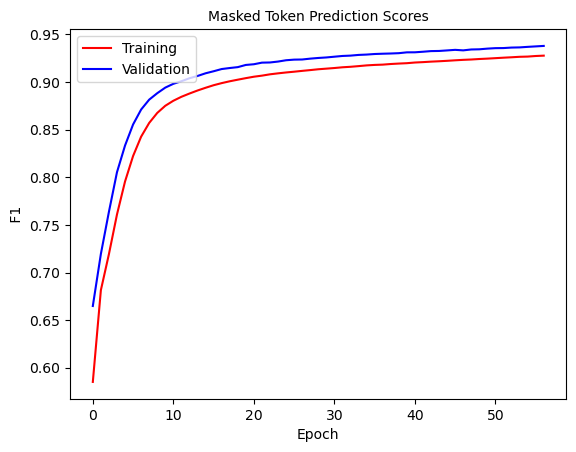

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 57: 100%|████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.0434]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9973168570303269   Masked Token f1 0.9281645794709188     SEQ F1 0.9894900576568472


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:52<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9516908212560387    v_masked_token_ F1:  0.9377996552062344  V SEQ F1:  0.9908821621177571


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


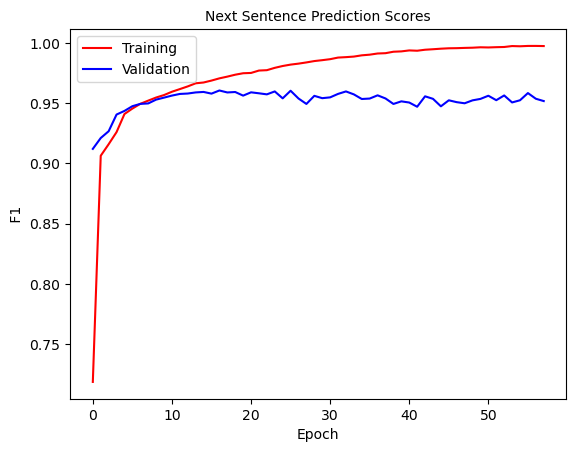

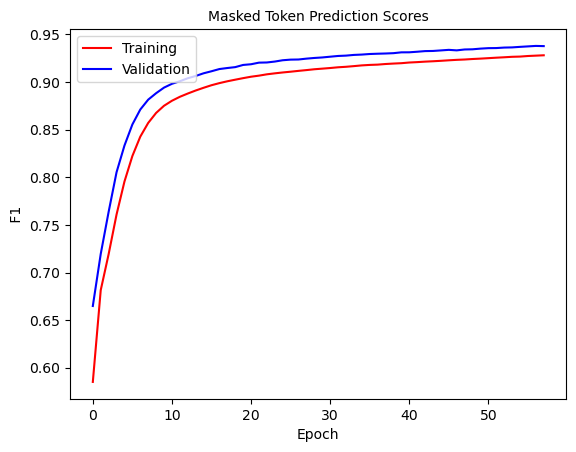

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 58: 100%|████████████████| 1014/1014 [20:27<00:00,  1.21s/it, loss=0.0603]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9977227125570861   Masked Token f1 0.9286763261211559     SEQ F1 0.9895736342316636


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.954435463110745    v_masked_token_ F1:  0.9384262301367802  V SEQ F1:  0.9909893840452189


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


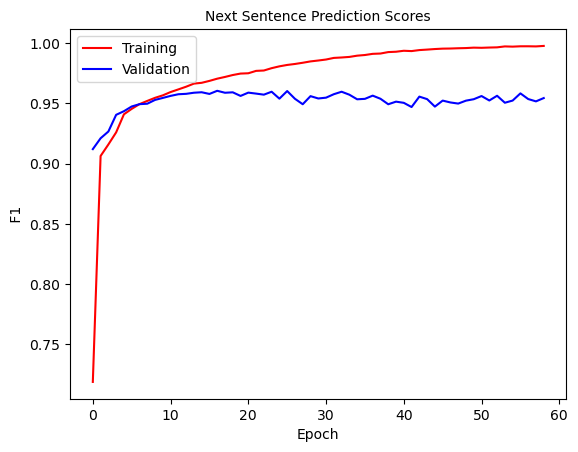

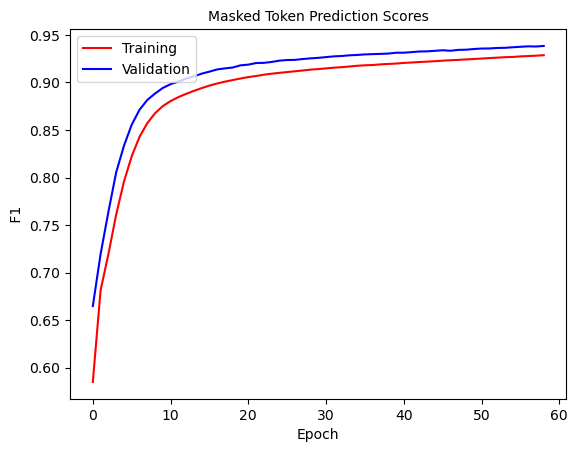

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 59: 100%|████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.0442]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9977228807404945   Masked Token f1 0.9289257426506292     SEQ F1 0.989619870616716


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9525329489291599    v_masked_token_ F1:  0.9386620708589213  V SEQ F1:  0.9909817931989388


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


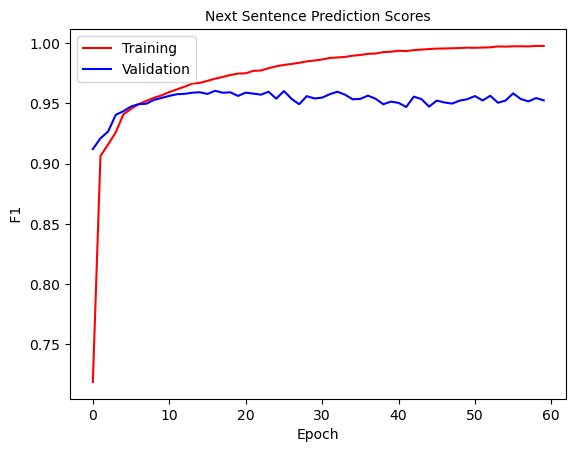

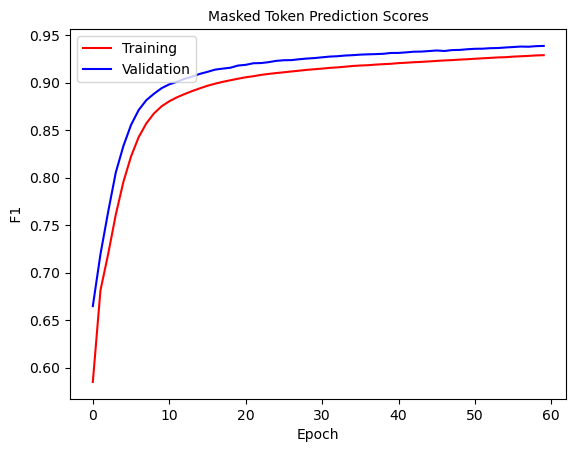

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 60: 100%|████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.0423]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.997809015041481   Masked Token f1 0.9294623834405681     SEQ F1 0.9896788736360614


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9530187512878632    v_masked_token_ F1:  0.9388619616897096  V SEQ F1:  0.9910303107395306


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


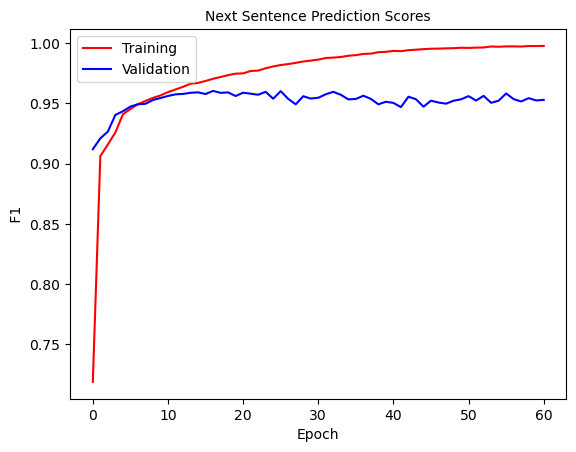

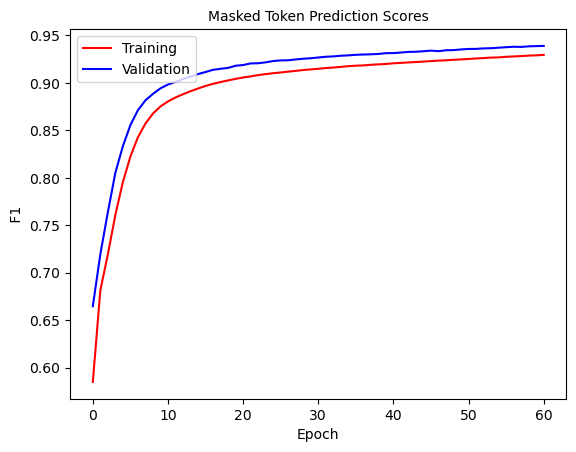

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 61: 100%|████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.0798]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9981042887389827   Masked Token f1 0.9298474996099104     SEQ F1 0.9897316713836583


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9510582688464101    v_masked_token_ F1:  0.9392559497976629  V SEQ F1:  0.9911031044746579


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


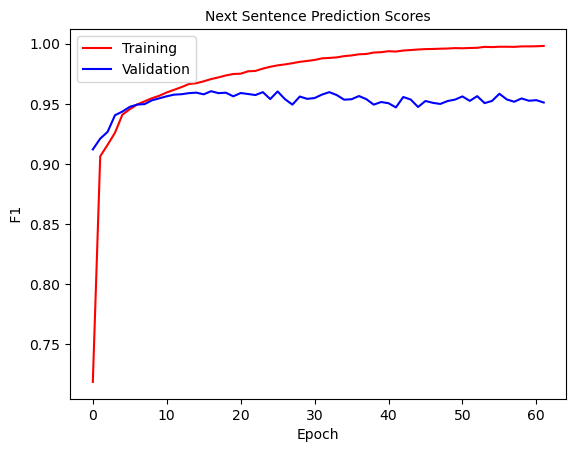

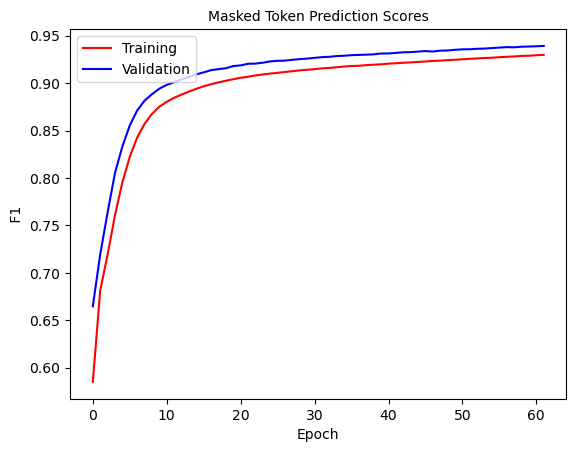

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 62: 100%|████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.0475]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9977968959617964   Masked Token f1 0.9302364585749722     SEQ F1 0.9897927699115483


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:52<00:00,  2.23it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9508903371478421    v_masked_token_ F1:  0.9396811580743161  V SEQ F1:  0.9911236815531036


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


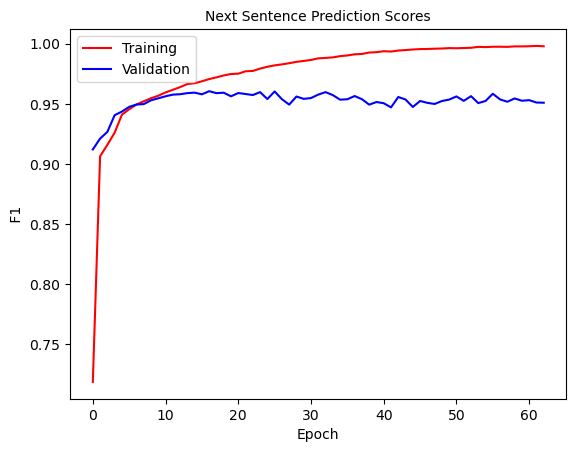

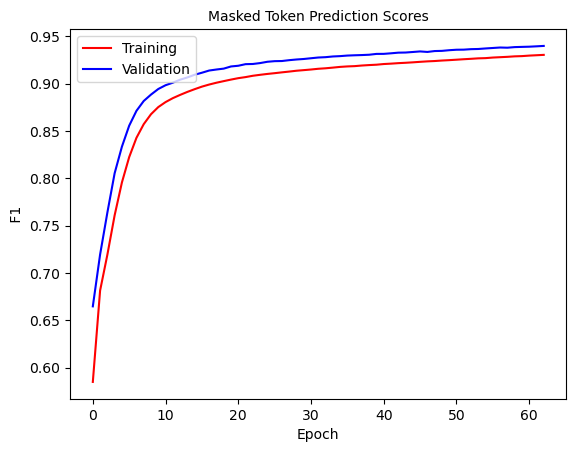

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 63: 100%|████████████████| 1014/1014 [20:23<00:00,  1.21s/it, loss=0.0432]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9980924250815334   Masked Token f1 0.9305520752078729     SEQ F1 0.9898326569446735


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9515962924819773    v_masked_token_ F1:  0.9399096982157152  V SEQ F1:  0.9911630734625713


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


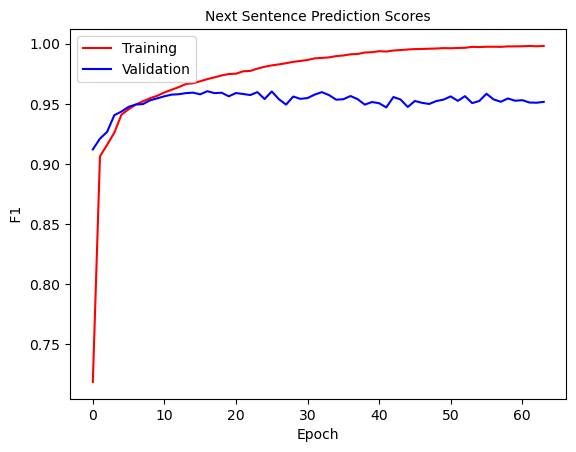

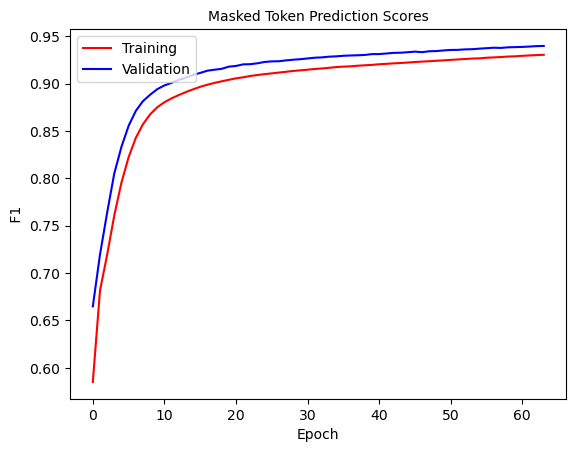

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 64: 100%|████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.0364]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9978088532177852   Masked Token f1 0.9307073077754063     SEQ F1 0.9898587175325696


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9539320614239181    v_masked_token_ F1:  0.9400692397075757  V SEQ F1:  0.9912041056007999


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


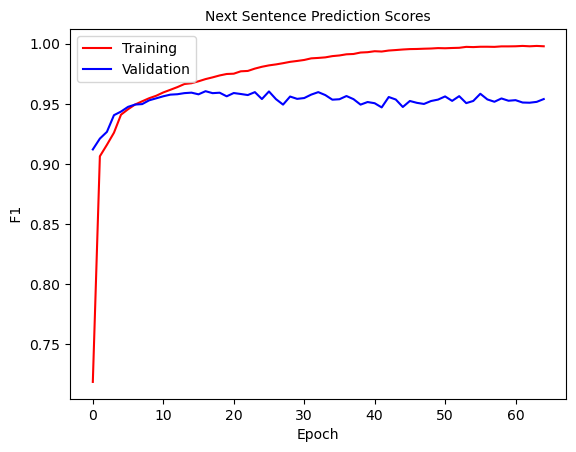

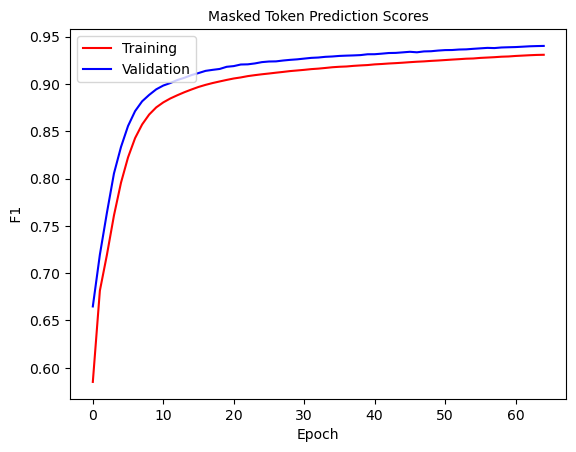

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 65: 100%|████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.0449]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9979567218926171   Masked Token f1 0.9311645265062094     SEQ F1 0.9899221208250026


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9576631731866764    v_masked_token_ F1:  0.9406396575320797  V SEQ F1:  0.9912977253974423


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


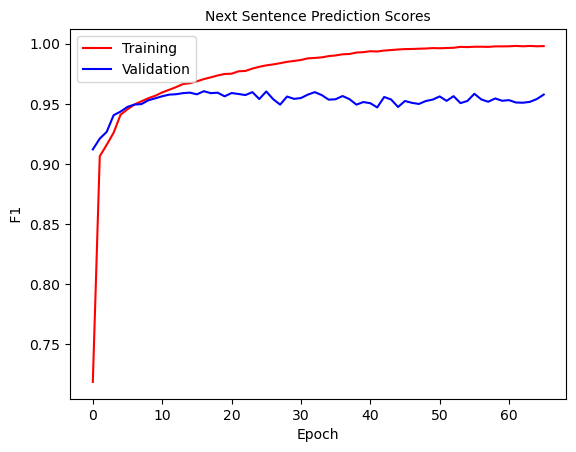

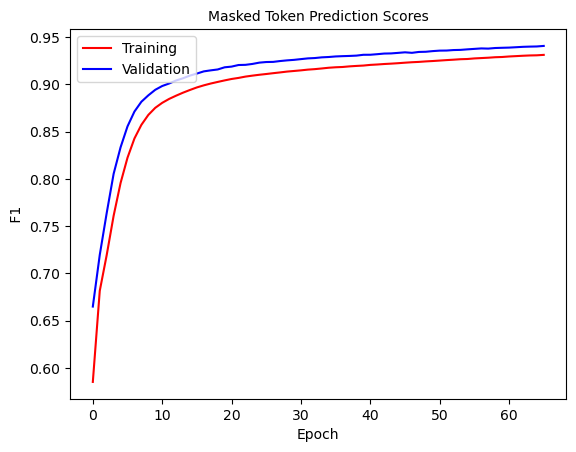

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 66: 100%|████████████████| 1014/1014 [20:20<00:00,  1.20s/it, loss=0.0456]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9982891676000345   Masked Token f1 0.9317248023665584     SEQ F1 0.9900055745021688


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9561757105943153    v_masked_token_ F1:  0.9407553956976038  V SEQ F1:  0.9913147486301358


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


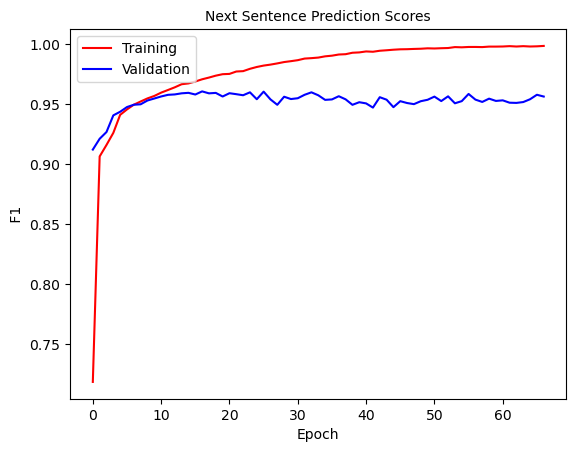

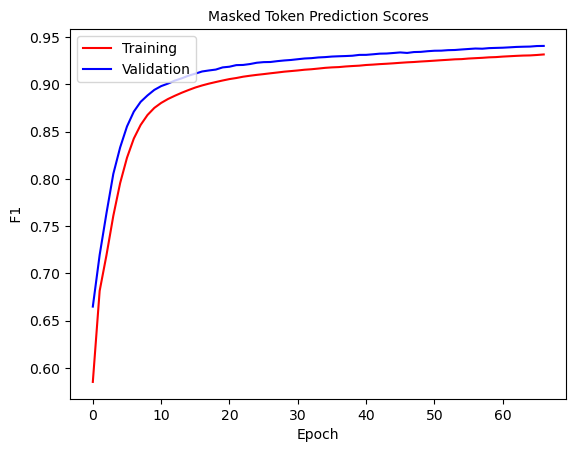

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 67: 100%|████████████████| 1014/1014 [20:21<00:00,  1.20s/it, loss=0.0357]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.998424654162359   Masked Token f1 0.9319777584467003     SEQ F1 0.9900399958586619


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.952885505606419    v_masked_token_ F1:  0.9411233005859899  V SEQ F1:  0.9913399434992198


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


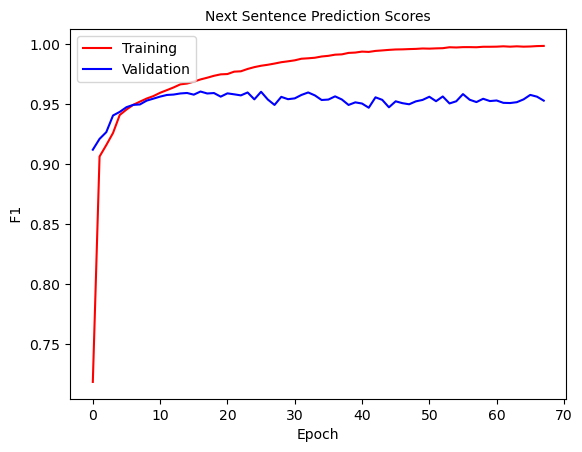

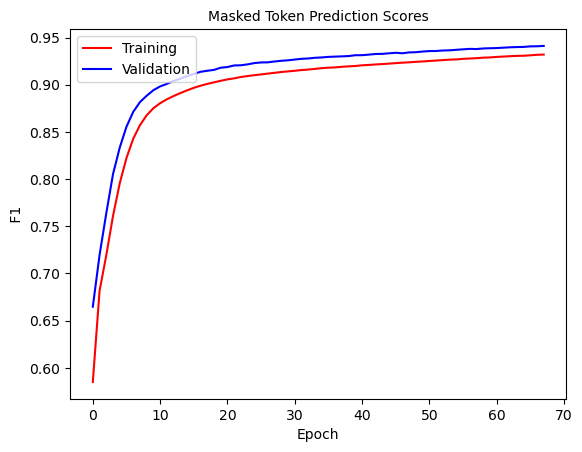

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 68: 100%|████████████████| 1014/1014 [20:24<00:00,  1.21s/it, loss=0.0645]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9981909696156733   Masked Token f1 0.9321909418153865     SEQ F1 0.9900711304367397


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9544347104867554    v_masked_token_ F1:  0.9413914063162692  V SEQ F1:  0.9913898084265969


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


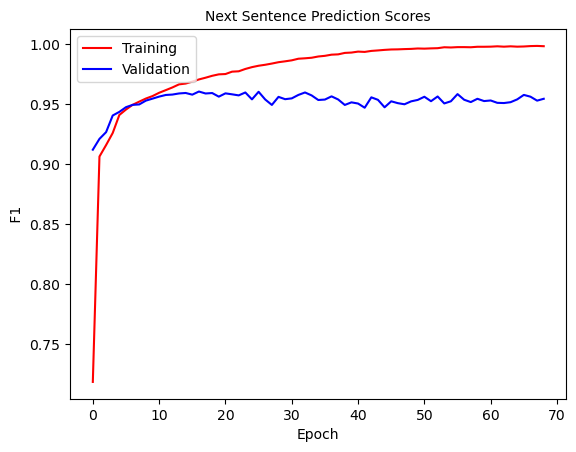

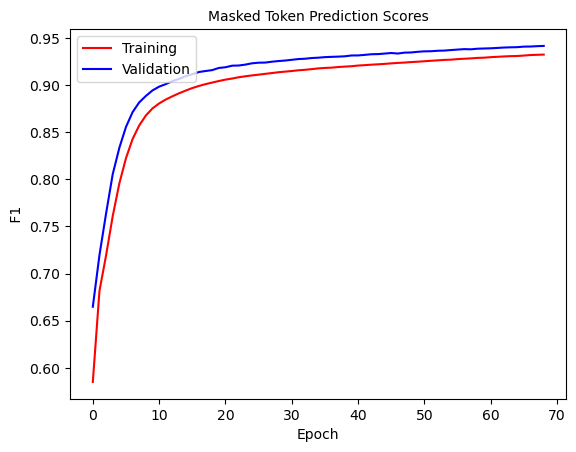

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 69: 100%|████████████████| 1014/1014 [20:22<00:00,  1.21s/it, loss=0.0699]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9982769654900803   Masked Token f1 0.93277058469661     SEQ F1 0.9901481335795919


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.956795865633075    v_masked_token_ F1:  0.9419641677510471  V SEQ F1:  0.9914588549684488


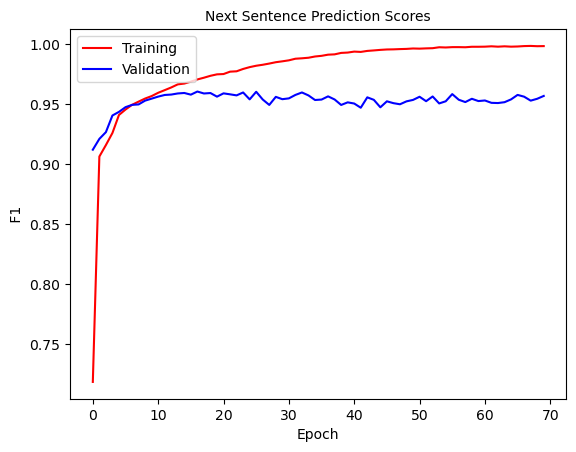

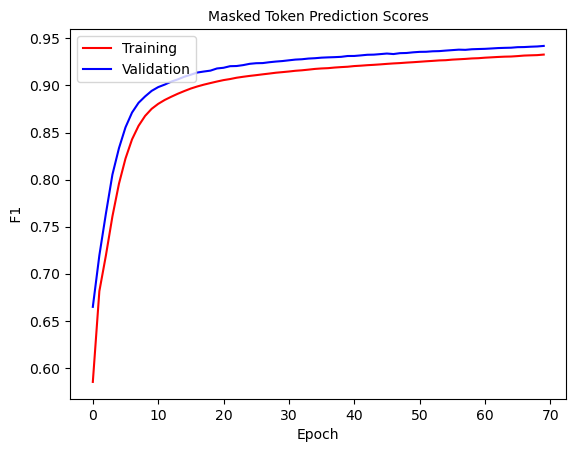

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 70: 100%|████████████████| 1014/1014 [20:25<00:00,  1.21s/it, loss=0.0466]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.9985356549560082   Masked Token f1 0.9330034809156696     SEQ F1 0.990194355758414


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.24it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9540318836093484    v_masked_token_ F1:  0.9419999237372375  V SEQ F1:  0.9914773285531345


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


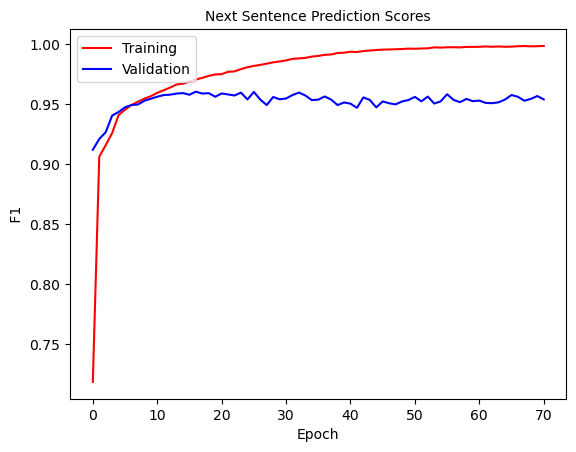

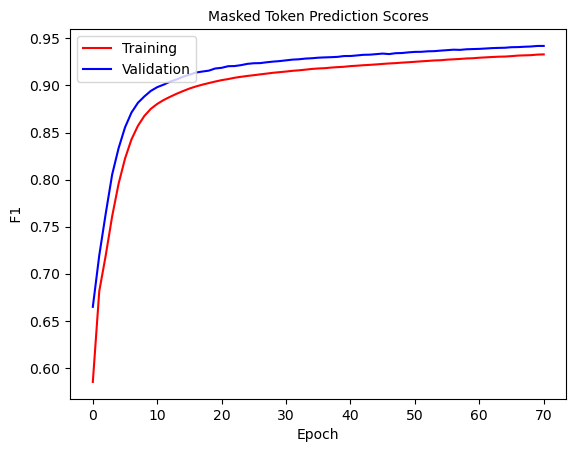

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 71: 100%|████████████████| 1014/1014 [20:22<00:00,  1.21s/it, loss=0.0356]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Training:   Instruction f1:  0.998670867382101   Masked Token f1 0.9335219218985328     SEQ F1 0.9902622041548063


  0%|                                                   | 0/250 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|█████████████████████████████████████████| 250/250 [01:51<00:00,  2.25it/s]
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels wi

Validation:  Instruction F1:  0.9553621994542553    v_masked_token_ F1:  0.9419280833438989  V SEQ F1:  0.9914784470619252


/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raisul/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


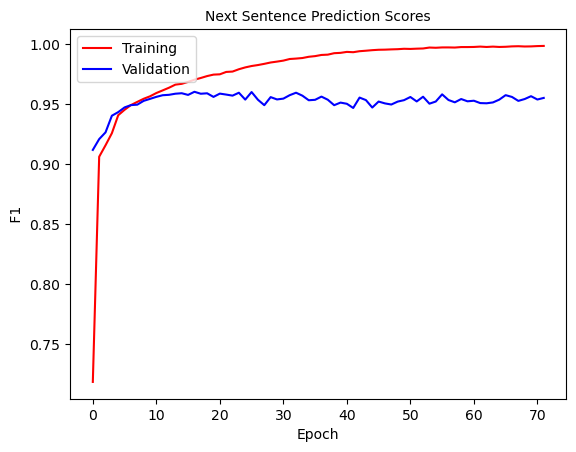

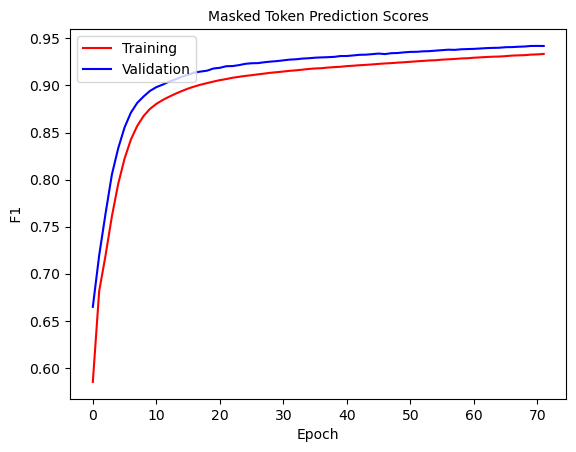

  0%|                                                  | 0/1014 [00:00<?, ?it/s]/tmp/ipykernel_3698173/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 72:  59%|██████████       | 600/1014 [11:59<08:16,  1.20s/it, loss=0.0361]


KeyboardInterrupt: 

In [33]:
from transformers import AdamW
from tqdm import tqdm  # for our progress bar
from itertools import chain

# initialize optimizer
optim = AdamW(model.parameters(), lr=5e-6)



epochs =100
counter = 0

global_instruction_metrices = []
global_masked_token_metrices = []

v_global_instruction_metrices = []
v_global_masked_token_metrices = []


for epoch in range(epochs):
    # setup loop with TQDM and dataloader
    train_loop = tqdm(train_loader, leave=True)
    
    
    instruction_predictions_all, instruction_ground_truths_all = None, None
    masked_token_predictions_all, masked_token_ground_truths_all = None, None
    seq_predictions_all, seq_ground_truths_all = None, None
    
    # activate training mode
    model.train()
    for N,batch in enumerate(train_loop):

        optim.zero_grad()
        # pull all tensor batches required for training
        input_ids = batch['input_ids'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        next_sentence_label = batch['next_sentence_label'].to(device)
        batch_mask_arr = batch ['mask_arr']
        labels = batch['labels'].to(device)

        # process
        outputs = model(input_ids, attention_mask=attention_mask,
                        token_type_ids=token_type_ids,
                        next_sentence_label=next_sentence_label,
                        labels=labels)


        token_prediction = torch.argmax(outputs.prediction_logits, axis=-1)
       


        # batch_masks = selection [BATCH_SIZE*N : (BATCH_SIZE*(N+1))]
        # print('batch_masks old: ',batch_masks)

        # print(batch ['mask_arr'].shape) #torch.flatten(mask_arr[i].nonzero()).tolist()
        batch_masks =   [ torch.flatten(bm.nonzero()).tolist()  for bm in batch_mask_arr]    # torch.flatten(batch ['mask_arr'].nonzero()).tolist()
        # print('batch_masks new: ',batch_masks)
        
        # print("BATCH_SIZE*N : (BATCH_SIZE*(N+1)): ",BATCH_SIZE*N , (BATCH_SIZE*(N+1)) )
        # print("batch_masks:",batch_masks)



        

        masked_token_prediction = [ token[batch_masks[t]].tolist() for t,token in enumerate(token_prediction) ]
        masked_token_prediction = list(chain.from_iterable(masked_token_prediction))
        
        masked_token_ground_truth   = [ token[batch_masks[t]].tolist() for t,token in enumerate(labels) ]
        masked_token_ground_truth = list(chain.from_iterable(masked_token_ground_truth))
        

        # print(token_prediction , token_ground_truth)

        # token_prediction = token_prediction.detach().cpu().numpy().flatten()
        # token_ground_truth = labels.detach().cpu().numpy().flatten()

        # print("token_prediction  : ", token_prediction)
        # print("token_ground_truth: ", token_ground_truth)


        seq_predictions   = token_prediction.detach().cpu().numpy().flatten()
        seq_ground_truths = labels.detach().cpu().numpy().flatten()

        
        instruction_prediction = torch.argmax(outputs.seq_relationship_logits, axis=-1)
        instruction_prediction   = instruction_prediction.detach().cpu().numpy().flatten()
        instruction_ground_truth = next_sentence_label.detach().cpu().numpy().flatten()
        
        if N==0:
            instruction_predictions_all   = instruction_prediction
            instruction_ground_truths_all = instruction_ground_truth
            
            masked_token_predictions_all         = masked_token_prediction
            masked_token_ground_truths_all       = masked_token_ground_truth  


            seq_predictions_all = seq_predictions
            seq_ground_truths_all = seq_ground_truths
            
        else:
            instruction_predictions_all   = np.concatenate((instruction_predictions_all, instruction_prediction))
            instruction_ground_truths_all = np.concatenate((instruction_ground_truths_all, instruction_ground_truth))
            
            masked_token_predictions_all   = np.concatenate((masked_token_predictions_all, masked_token_prediction))
            masked_token_ground_truths_all = np.concatenate((masked_token_ground_truths_all, masked_token_ground_truth))

            seq_predictions_all = np.concatenate((seq_predictions_all, seq_predictions))
            seq_ground_truths_all = np.concatenate((seq_ground_truths_all, seq_ground_truths))
            

        # extract loss
        loss = outputs.loss
        # calculate loss for every parameter that needs grad update
        loss.backward()
        # update parameters
        optim.step()
        # print relevant info to progress bar
        train_loop.set_description(f'Epoch {epoch}')
        train_loop.set_postfix(loss=loss.item())
    
    
    instruction_accuracy = (accuracy_score(instruction_ground_truths_all,instruction_predictions_all))
    instruction_precision, instruction_recall, instruction_f1, _ = precision_recall_fscore_support(instruction_ground_truths_all,instruction_predictions_all, average='binary')
    
    masked_token_accuracy = (accuracy_score(masked_token_ground_truths_all, masked_token_predictions_all))
    masked_token_precision, masked_token_recall, masked_token_f1, _ = precision_recall_fscore_support(masked_token_ground_truths_all,masked_token_predictions_all,average='weighted')

    seq_precision, seq_recall, seq_f1, _ = precision_recall_fscore_support(seq_ground_truths_all,seq_predictions_all,average='weighted')
    
    print("Training: ",  ' Instruction f1: ', instruction_f1 , '  Masked Token f1',masked_token_f1 , "    SEQ F1",seq_f1)
    global_instruction_metrices.append(instruction_f1)
    global_masked_token_metrices.append( masked_token_f1) 

    ###########################################
    ###############  EVAL Validation  #########
    ###########################################
    with torch.no_grad():
        model.eval()
#         v_predictions_all, v_ground_truths_all = None, None
        
        v_instruction_predictions_all, v_instruction_ground_truths_all = None, None
        v_masked_token_predictions_all, v_masked_token_ground_truths_all = None, None
        v_seq_predictions_all, v_seq_ground_truths_all = None, None
    
    
        validation_loop = tqdm(validation_loader, leave=True)
        for N,v_batch in enumerate(validation_loop):
            
            
            
            v_input_ids = v_batch['input_ids'].to(device)
            v_token_type_ids = v_batch['token_type_ids'].to(device)
            v_attention_mask = v_batch['attention_mask'].to(device)
            v_next_sentence_label = v_batch['next_sentence_label'].to(device)
            v_mask_arr = v_batch ['mask_arr']
            v_labels = v_batch['labels'].to(device)
            # process
            v_outputs = model(v_input_ids, attention_mask=v_attention_mask,
                            token_type_ids=v_token_type_ids,
                            next_sentence_label=v_next_sentence_label,
                            labels=v_labels)
        
            v_token_prediction = torch.argmax(v_outputs.prediction_logits, axis=-1)

                    

            v_batch_masks =   [ torch.flatten(bm.nonzero()).tolist()  for bm in v_mask_arr]
            
            v_masked_token_prediction = [ token[v_batch_masks[t]].tolist() for t,token in enumerate(v_token_prediction) ]
            v_masked_token_prediction = list(chain.from_iterable(v_masked_token_prediction))
            
            v_masked_token_ground_truth   = [ token[v_batch_masks[t]].tolist() for t,token in enumerate(v_labels) ]
            v_masked_token_ground_truth = list(chain.from_iterable(v_masked_token_ground_truth))
    
            
            

            v_seq_prediction = v_token_prediction.detach().cpu().numpy().flatten()
            v_seq_ground_truth = v_labels.detach().cpu().numpy().flatten()


            

            # token_prediction = [ token[batch_masks[t]].tolist() for t,token in enumerate(token_prediction) ]
            # token_prediction = list(chain.from_iterable(token_prediction))
            
            # token_ground_truth   = [ token[batch_masks[t]].tolist() for t,token in enumerate(labels) ]
            # token_ground_truth = list(chain.from_iterable(token_ground_truth))

            
            v_instruction_prediction = torch.argmax(v_outputs.seq_relationship_logits, axis=-1)
            v_instruction_prediction   = v_instruction_prediction.detach().cpu().numpy().flatten()
            v_instruction_ground_truth = v_next_sentence_label.detach().cpu().numpy().flatten()



        

            if N==0:
                v_instruction_predictions_all   = v_instruction_prediction
                v_instruction_ground_truths_all = v_instruction_ground_truth

                v_masked_token_predictions_all   = v_masked_token_prediction
                v_masked_token_ground_truths_all = v_masked_token_ground_truth
                
                v_seq_predictions_all= v_seq_prediction
                v_seq_ground_truths_all = v_seq_ground_truth

        

            else:
                v_instruction_predictions_all   = np.concatenate((v_instruction_predictions_all, v_instruction_prediction))
                v_instruction_ground_truths_all = np.concatenate((v_instruction_ground_truths_all, v_instruction_ground_truth))

                v_masked_token_predictions_all   = np.concatenate((v_masked_token_predictions_all, v_masked_token_prediction ))
                v_masked_token_ground_truths_all = np.concatenate((v_masked_token_ground_truths_all, v_masked_token_ground_truth ))
                
                v_seq_predictions_all =np.concatenate((v_seq_predictions_all, v_seq_prediction ))
                v_seq_ground_truths_all =np.concatenate((v_seq_ground_truths_all, v_seq_ground_truth ))
                

            

        v_instruction_accuracy = (accuracy_score(v_instruction_ground_truths_all,v_instruction_predictions_all))
        v_instruction_precision, v_instruction_recall, v_instruction_f1, _ = precision_recall_fscore_support(v_instruction_ground_truths_all,v_instruction_predictions_all, average='binary')


        v_masked_token_accuracy = (accuracy_score(v_masked_token_ground_truths_all, v_masked_token_predictions_all))
        v_masked_token_precision, v_masked_token_recall, v_masked_token_f1, _ = precision_recall_fscore_support(v_masked_token_ground_truths_all,v_masked_token_predictions_all,average='weighted')


        v_seq_accuracy = (accuracy_score(v_seq_predictions_all, v_seq_ground_truths_all))
        v_seq_precision, v_seq_recall, v_seq_f1, _ = precision_recall_fscore_support(v_seq_ground_truths_all,v_seq_predictions_all,average='weighted')

        print("Validation: ", "Instruction F1: ", v_instruction_f1,  "   v_masked_token_ F1: ",v_masked_token_f1 ," V SEQ F1: ", v_seq_f1)
        
        v_global_instruction_metrices.append(v_instruction_f1)
        v_global_masked_token_metrices.append(v_masked_token_f1) 

    
    plot_graph(global_instruction_metrices, v_global_instruction_metrices, 'Next Sentence Prediction Scores')
    plot_graph(global_masked_token_metrices, v_global_masked_token_metrices, 'Masked Token Prediction Scores')
    model.save_pretrained("./../../models/"+EXPERIMENT_NAME+"_model.ckpt")

In [ ]:
# Save the trained model weights


In [ ]:
a=[0,1,2,3,4,5]
a[0:3]